#### PROBLEM STATEMENT

    • DOMAIN: Industrial safety. NLP based Chatbot.
    • CONTEXT:

    The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

#### • DATA DESCRIPTION:

    This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

    Columns description:

    ‣ Data: timestamp or time/date information
    ‣ Countries: which country the accident occurred (anonymised)
    ‣ Local: the city where the manufacturing plant is located (anonymised)
    ‣ Industry sector: which sector the plant belongs to
    ‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
    ‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
    ‣ Gender: if the person is male of female
    ‣ Employee or Third Party: if the injured person is an employee or a third party
    ‣ Critical Risk: some description of the risk involved in the accident
    ‣ Description: Detailed description of how the accident happened.
    Link to download the dataset: https://drive.google.com/file/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing, Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

#### • PROJECT OBJECTIVE:

    Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

#### • PROJECT TASK: [ Duration: 6 weeks, Score: 100 points]

    1. Milestone 1: [ Duration: 2 weeks, Score: 20 points] 
    ‣ Input: Interim report
    ‣ Process:
        ‣ Step 1: Import the data
        ‣ Step 2: Data cleansing
        ‣ Step 3: Data preprocessing
        ‣ Step 4: Data preparation to be used for AIML model learning
        ‣ Output: Clean data as .xlsx or .csv file to be used for AIML model learning 
    
    2. Milestone 2: [ Duration: 2 weeks, Score: 20 points]
    ‣ Input: Output of milestone 1 
    ‣ Process:
        ‣ Step 1: NLP pre processing
        ‣ Step 2: Design, train and test machine learning classifiers
        ‣ Step 3: Design, train and test Neural networks classifiers
        ‣ Step 4: Design, train and test RNN or LSTM classifiers
        ‣ Step 5: Choose the best performing model classifier and pickle it.
        ‣ Output: Pickled model to be used for future prediction
        ‣ Submission: Interim report

    3. Milestone 3: [ Duration: 2 weeks, Score: 60 points]
        ‣ Input: Pickled model from milestone 2 
        ‣ Process: [ 15 points ]
        ‣ Step 1: Design a clickable UI which can automate tasks performed under milestone 1 [ 5 points ] 
        ‣ Step 2: Design a clickable UI which can automate tasks performed under milestone 2 [ 5 points ] 
        ‣ Step 3: Design a clickable UI based chatbot interface [ 5 points ]
        ‣ Output: Clickable UI based chatbot interface which accepts text as input and replies back with relevant answers. ‣ Submission: Final report [ 45 points ]
        ‣ Hints:
        ‣ Please refer to the blog to understand the basic designing and functioning of chatbots: https://www.mygreatlearning.com/blog/basics-of-building-an-artificial-intelligence-chatbot/
        ‣ To make GUI as a desk app you can use TKINTER library.
        ‣ To make web service GUI you can use FLASK or DJANGO library.

## 1. Milestone 1: 

####  ‣ Input: Interim report
        ‣ Process:
            ‣ Step 1: Import the data
            ‣ Step 2: Data cleansing
            ‣ Step 3: Data preprocessing
            ‣ Step 4: Data preparation to be used for AIML model learning
            ‣ Output: Clean data as .xlsx or .csv file to be used for AIML model learning 

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.tokenize import word_tokenize
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

#### ‣ Step 1: Import the data

In [2]:
data=pd.read_csv("/Users/shreekkanthkalyanasundaram/AIML/Capestone/Data Set - industrial_safety_and_health_database_with_accidents_description.csv")

In [3]:
print("Number of rows = {0}\nNumber of Columns = {1} ".format(data.shape[0], data.shape[1]))

Number of rows = 425
Number of Columns = 11 


In [4]:
data.head(3)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


#### ‣ Step 2: Data cleansing

* As Data field contains date of unuseable format. Lets split them into year, month & day field and drop Data

In [6]:
data['Data']=pd.to_datetime(data.Data)
data['year']=data['Data'].apply(lambda x : x.year)
data['month']=data['Data'].apply(lambda x : x.month)
data['date']=data['Data'].apply(lambda x : x.day)

* dropping 'Unnamed: 0','Data' from dataframe

In [7]:
data.drop(["Unnamed: 0","Data"], axis=1, inplace=True)

* Renaming due to spelling mistakes in column headers 

In [8]:
data.rename(columns={'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
data.head()

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,year,month,date
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6
3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8
4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10


In [9]:
print('\033[1m' + "categorical attributes:"+'\033[0m')
print("="*30)
cat_attr=[]
for i in data.columns:
    if 86 >= data[i].nunique():
        print(i,":",data[i].unique())
        cat_attr.append(i)

categorical attributes:
Country : ['Country_01' 'Country_02' 'Country_03']
Local : ['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']
Industry Sector : ['Mining' 'Metals' 'Others']
Accident Level : ['I' 'IV' 'III' 'II' 'V']
Potential Accident Level : ['IV' 'III' 'I' 'II' 'V' 'VI']
Gender : ['Male' 'Female']
Employee type : ['Third Party' 'Employee' 'Third Party (Remote)']
Critical Risk : ['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 'Traffic' 'Projection'
 'Venomous Animals' 'Plates' 'Projection/Burning' 'remains of choco'
 'Vehicles and Mobile Equipment' 'Projection/Choco' 'Machine Protection'
 'Power lock' 'Burn' 'Pr

In [10]:
data.isnull().sum()

Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
year                        0
month                       0
date                        0
dtype: int64

* No null values found

In [11]:
data.describe() #5-Point Summary analysis

,year,month,date
count,425.000000,425.000000,425.000000
mean,2016.329412,5.254118,14.981176
std,0.470554,3.189959,8.661051
min,2016.000000,1.000000,1.000000
25%,2016.000000,3.000000,8.000000
50%,2016.000000,5.000000,15.000000
75%,2017.000000,7.000000,22.000000
max,2017.000000,12.000000,31.000000


In [12]:
data.describe(include=object)

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
count,425,425,425,425,425,425,425,425,425
unique,3,12,3,5,6,2,3,33,411
top,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,During the activity of chuteo of ore in hopper...
freq,251,90,241,316,143,403,189,232,3


#### Inference:
    * Small data set(425x11) but with relevant information.
    * No missing values in the dataset.Also, removed unnecessary column named ”Unnamed: 0” & "Data" as we do not know any related metadata and adds no value to the analysis.
    * Renamed columns with spelling mistakes and space
    * Five Point Summary analysis:
        - Country 01 is the country where most of the accidents happen (more than 50%)
        - Local 03 (which also belongs to Country 01) is where most of the accidents happen
        - Mining is also the most significant contributor to accidents
        - Male (95%) and Third Party (43%) also counts for kind of people that suffers more accident

#### EDA

In [13]:
data['Country'].value_counts()

Country_01    251
Country_02    130
Country_03     44
Name: Country, dtype: int64

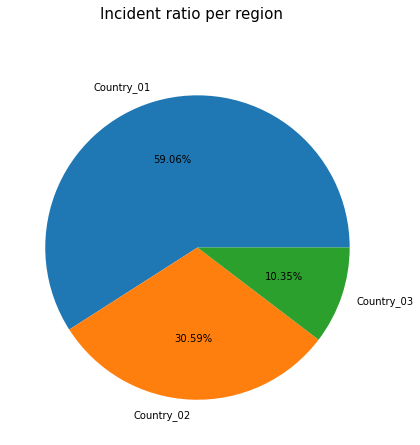

In [14]:
fig=plt.figure(figsize=(7,7))
fig.suptitle('Incident ratio per region', fontsize=15)
plt.pie(data['Country'].value_counts(), labels=['Country_01', 'Country_02','Country_03'], explode=(0,0,0),autopct = '%1.2f%%')
plt.show()

#### Inference:
    * Country_01 has more incident records - 59.06% 
    * Country_02 has 30.59% of incident registered
    * Country_03 has 10.35% of records

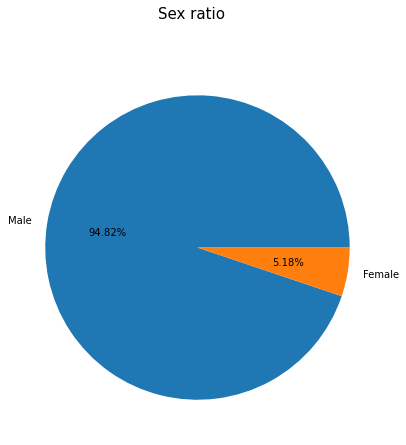

In [15]:
fig=plt.figure(figsize=(7,7))
fig.suptitle('Sex ratio', fontsize=15)
plt.pie(data['Gender'].value_counts(), labels=['Male', 'Female'], explode=(0,0),autopct = '%1.2f%%')
plt.show()

#### Inference:
    * Male employees are much impacted during the accident at workplace than the female employees

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

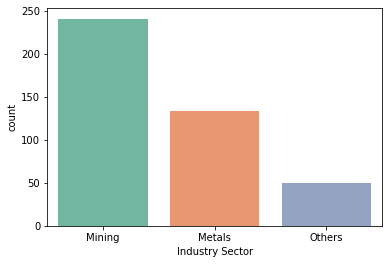

In [16]:
sns.countplot(data=data,x=data['Industry Sector'],palette = "Set2")

In [17]:
#Percentage of contribution
data['Industry Sector'].value_counts(normalize=True)*100

Mining    56.705882
Metals    31.529412
Others    11.764706
Name: Industry Sector, dtype: float64

#### Inference:
       * Above plots depicts Mining industry sector has more Accidents, followed by Metals Industry Sector and others 

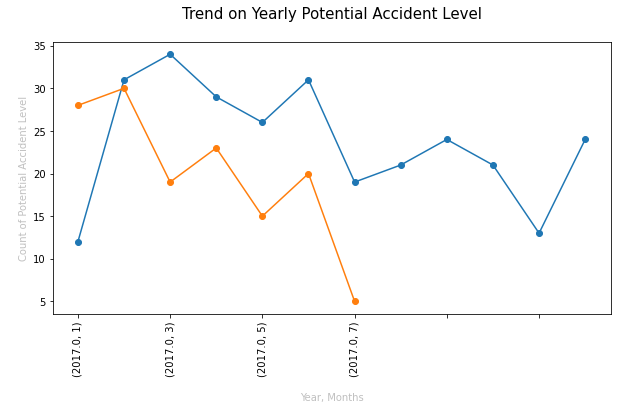

In [18]:
#Accident patterns by yearly
fig,(ax1) = plt.subplots()
ax1.set_title('Trend on Yearly Potential Accident Level\n',fontsize = 15)
data.groupby([data[data['year']==2016]['year'],'month'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
data.groupby([data[data['year']==2017]['year'],'month'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
plt.xlabel('\nYear, Months').set_color('silver')
plt.ylabel('\nCount of Potential Accident Level').set_color('silver')
plt.xticks(rotation = 'vertical')
plt.show()

#### Inference:
    * Above plot depicts the count of Potential Accident Level for each month against the years (2016 & 2017)

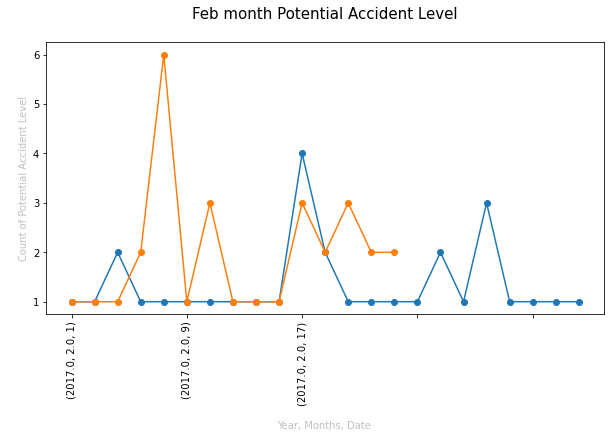

In [19]:
# EDA for hightest Accident month - Feb per Above analysis
fig,(ax1) = plt.subplots()
ax1.set_title('Feb month Potential Accident Level\n',fontsize = 15)
data.groupby([data[data['year']==2016]['year'],data[data['month']==2]['month'],'date'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
data.groupby([data[data['year']==2017]['year'],data[data['month']==2]['month'],'date'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
plt.xlabel('\nYear, Months, Date ').set_color('silver')
plt.ylabel('\nCount of Potential Accident Level').set_color('silver')
plt.xticks(rotation = 'vertical')
plt.show()

#### Inference:
    * Per day Potential Accident count level was higher on 2017 month of Feb

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Pressed'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Chemical substances'),
  Text(4, 0, 'Venomous Animals'),
  Text(5, 0, 'Cut'),
  Text(6, 0, 'Projection'),
  Text(7, 0, 'Bees'),
  Text(8, 0, 'Fall'),
  Text(9, 0, 'Vehicles and Mobile Equipment'),
  Text(10, 0, 'remains of choco'),
  Text(11, 0, 'Pressurized Systems'),
  Text(12, 0, 'Fall prevention (same level)'),
  Text(13, 0, 'Fall prevention'),
  Text(14, 0, 'Suspended Loads'),
  Text(15, 0, 'Power lock'),
  Text(16, 0, 'Liquid Metal'),
  Text(17, 0, 'Blocking and isolation of energies'),
  Text(18, 0, 'Pressurized Systems / Chemical Substances'),
  Text(19, 0, 'Machine Protection'),
  Text(20, 0, 'Electrical Shock'),
  Text(21, 0, 'Projection of fragments'),
  Text(22, 0, 'Electrical installation'),
  Text(23, 0, 'Projection/Manual Tools'),
 

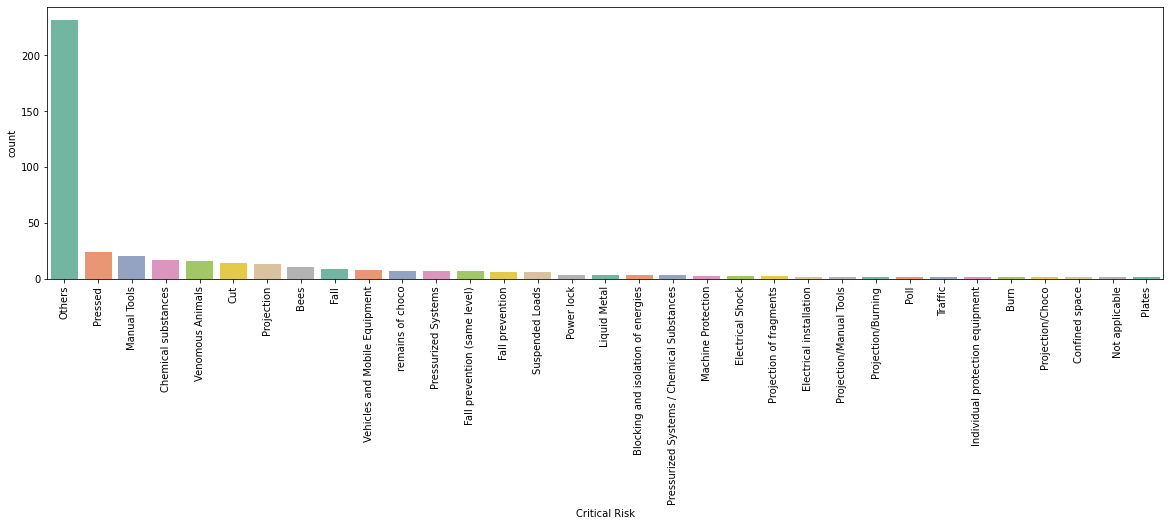

In [20]:
#Analysising Critical Risk - count of each items
plt.figure(figsize=(20,5))
descending_order = data['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(data=data,x=data['Critical Risk'],palette = "Set2",order=descending_order)
plt.xticks(rotation = 'vertical')

#### Inference:
    * 232 records are uncategorised risks (others), followed by 24 records of Pressed issues

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

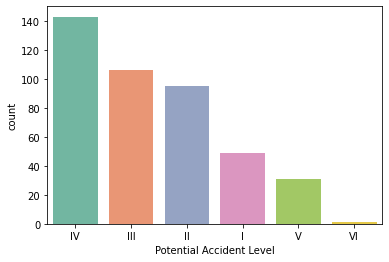

In [21]:
#trend on Potential Accident Level
descending_order = data['Potential Accident Level'].value_counts().sort_values(ascending=False).index
sns.countplot(data=data,x=data['Potential Accident Level'],palette = "Set2",order=descending_order)

In [22]:
#Percentage of contribution
data['Potential Accident Level'].value_counts(normalize=True)*100

IV     33.647059
III    24.941176
II     22.352941
I      11.529412
V       7.294118
VI      0.235294
Name: Potential Accident Level, dtype: float64

#### Inference:
    * 33.64 % of risk belongs to Potential Accident Level 3   
    * 24.9 % of risk belongs to Potential Accident Level 2 
    * 22.4 % of risk belongs to Potential Accident Level 1
    * 11.5 % of risk belongs to Potential Accident Level 0
    * 7.3 % of risk belongs to Potential Accident Level 4
    * 0.24 % of risk belongs to Potential Accident Level 5
    
    This shows that we are dealing with bias data

In [23]:
data.head(3)

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,year,month,date
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6


#### ‣ Step 3: Data preprocessing

#### Label encoding to convert as numerical values

* Since need to have labels that should be capable of using in for loop, lets perform labelencoding - like Potential Accident Level to covert Roman char to numbers

In [24]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
df = np.array(ct.fit_transform(data))
df

array([[1.0, 0.0, 0.0, ..., 2016, 1, 1],
       [0.0, 1.0, 0.0, ..., 2016, 1, 2],
       [0.0, 0.0, 1.0, ..., 2016, 1, 6],
       ...,
       [0.0, 0.0, 0.0, ..., 2017, 7, 5],
       [0.0, 0.0, 0.0, ..., 2017, 7, 6],
       [0.0, 0.0, 0.0, ..., 2017, 7, 9]], dtype=object)

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data['Potential Accident Level']=le.fit_transform(data['Potential Accident Level']).astype(np.int8)
# data['Country']=le.fit_transform(data['Country']).astype(np.int8)
data['Gender']=le.fit_transform(data['Gender']).astype(np.int8)
# data['Employee type']=le.fit_transform(data['Employee type']).astype(np.int8)
data['Critical Risk']=le.fit_transform(data['Critical Risk']).astype(np.int8)
data['Accident Level']=le.fit_transform(data['Accident Level']).astype(np.int8)
data['Industry Sector']=le.fit_transform(data['Industry Sector']).astype(np.int8)
data['Local']=le.fit_transform(data['Local']).astype(np.int8)

* onehot encoding using dummies approach on country to aviod some sort of hierarchy/order issue on label encoding

In [26]:
# creating initial dataframe
dum_df = pd.DataFrame(data, columns=['Country','Employee type'])
# generate binary values using get_dummies
dum_df = pd.get_dummies(dum_df, columns=["Country","Employee type"], prefix=["Type_is","Etype_is"] )
# # merge with main df bridge_df on key values
data = data.join(dum_df)
data.head(10)

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,year,month,date,Type_is_Country_01,Type_is_Country_02,Type_is_Country_03,Etype_is_Employee,Etype_is_Third Party,Etype_is_Third Party (Remote)
0,Country_01,0,1,0,3,1,Third Party,20,While removing the drill rod of the Jumbo 08 f...,2016,1,1,1,0,0,0,1,0
1,Country_02,1,1,0,3,1,Employee,21,During the activation of a sodium sulphide pum...,2016,1,2,0,1,0,1,0,0
2,Country_01,2,1,0,2,1,Third Party (Remote),15,In the sub-station MILPO located at level +170...,2016,1,6,1,0,0,0,0,1
3,Country_01,3,1,0,0,1,Third Party,16,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,1,0,0,0,1,0
4,Country_01,3,1,3,3,1,Third Party,16,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,1,0,0,0,1,0
5,Country_02,4,0,0,2,1,Third Party (Remote),21,During the unloading operation of the ustulado...,2016,1,12,0,1,0,0,0,1
6,Country_02,4,0,0,2,1,Employee,11,The collaborator reports that he was on street...,2016,1,16,0,1,0,1,0,0
7,Country_01,3,1,0,2,1,Third Party,20,"At approximately 04:50 p.m., when the mechanic...",2016,1,17,1,0,0,0,1,0
8,Country_02,1,1,0,3,1,Third Party (Remote),16,Employee was sitting in the resting area at le...,2016,1,19,0,1,0,0,0,1
9,Country_01,5,0,0,1,1,Third Party,4,At the moment the forklift operator went to ma...,2016,1,26,1,0,0,0,1,0


* dropping Country column

In [27]:
data.drop(["Country"], axis=1, inplace=True)
data.head(3)

,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,year,month,date,Type_is_Country_01,Type_is_Country_02,Type_is_Country_03,Etype_is_Employee,Etype_is_Third Party,Etype_is_Third Party (Remote)
0,0,1,0,3,1,Third Party,20,While removing the drill rod of the Jumbo 08 f...,2016,1,1,1,0,0,0,1,0
1,1,1,0,3,1,Employee,21,During the activation of a sodium sulphide pum...,2016,1,2,0,1,0,1,0,0
2,2,1,0,2,1,Third Party (Remote),15,In the sub-station MILPO located at level +170...,2016,1,6,1,0,0,0,0,1


In [28]:
#Function definition to generate Word cloud 
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

def show_wordcloud(data,bg_color):
    wordcloud = WordCloud(
        background_color=bg_color,
        stopwords=stopwords,
        max_words=100,
        colormap='ocean_r',
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data).lower())

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
    print(wordcloud.words_.keys())

#### words in each Potential Accident Levels


Potential Accident Level:  0


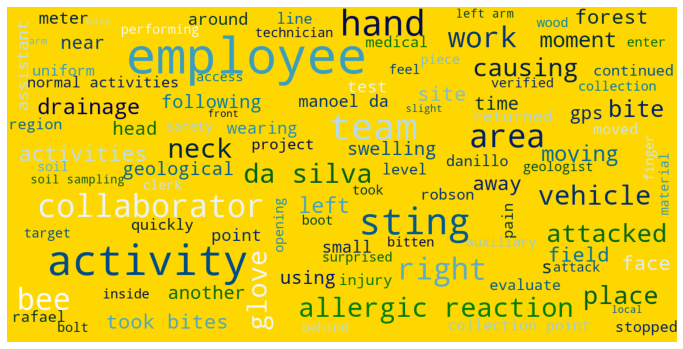

dict_keys(['employee', 'activity', 'team', 'sting', 'hand', 'area', 'collaborator', 'bee', 'right', 'work', 'vehicle', 'neck', 'glove', 'da silva', 'allergic reaction', 'causing', 'attacked', 'place', 'bite', 'moving', 'left', 'drainage', 'activities', 'moment', 'field', 'face', 'away', 'site', 'forest', 'took bites', 'swelling', 'using', 'time', 'another', 'near', 'head', 'gps', 'geological', 'following', 's', 'around', 'small', 'point', 'test', 'assistant', 'meter', 'returned', 'wearing', 'manoel da', 'project', 'level', 'region', 'uniform', 'injury', 'pain', 'line', 'continued', 'robson', 'rafael', 'danillo', 'stopped', 'evaluate', 'medical', 'moved', 'quickly', 'collection point', 'normal activities', 'target', 'inside', 'soil', 'bitten', 'feel', 'opening', 'technician', 'performing', 'took', 'collection', 'behind', 'surprised', 'attack', 'finger', 'piece', 'material', 'boot', 'safety', 'bolt', 'auxiliary', 'wood', 'geologist', 'access', 'clerk', 'enter', 'verified', 'soil sampling

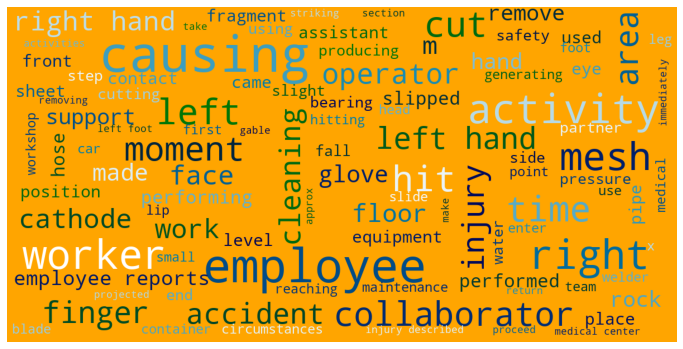

dict_keys(['causing', 'employee', 'activity', 'right', 'worker', 'mesh', 'hit', 'cut', 'left', 'time', 'collaborator', 'moment', 'area', 'injury', 'finger', 'left hand', 'cleaning', 'operator', 'accident', 'cathode', 'face', 'work', 'right hand', 'm', 'floor', 'made', 'glove', 'hand', 'remove', 'rock', 'support', 'employee reports', 'slipped', 'performed', 'performing', 'hose', 'assistant', 'sheet', 'place', 'equipment', 'front', 'used', 'position', 'level', 'fragment', 'contact', 'came', 'eye', 'pipe', 'side', 'step', 'fall', 'slight', 'producing', 'using', 'safety', 'pressure', 'end', 'water', 'partner', 'bearing', 'cutting', 'foot', 'generating', 'first', 'maintenance', 'team', 'medical', 'circumstances', 'head', 'point', 'enter', 'lip', 'slide', 'use', 'hitting', 'x', 'small', 'reaching', 'container', 'leg', 'welder', 'workshop', 'car', 'blade', 'injury described', 'left foot', 'medical center', 'immediately', 'take', 'removing', 'approx', 'section', 'striking', 'activities', 'proc

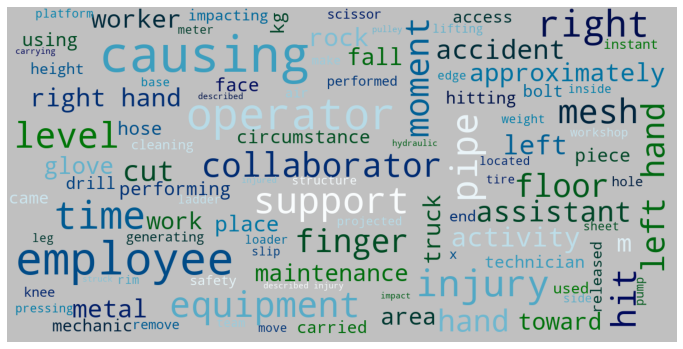

dict_keys(['causing', 'employee', 'operator', 'time', 'right', 'injury', 'pipe', 'support', 'level', 'equipment', 'collaborator', 'mesh', 'moment', 'hit', 'finger', 'floor', 'left hand', 'hand', 'assistant', 'cut', 'left', 'activity', 'accident', 'approximately', 'm', 'metal', 'rock', 'worker', 'right hand', 'maintenance', 'work', 'toward', 'area', 'glove', 'truck', 'fall', 'place', 'performing', 'hose', 'face', 'using', 'piece', 'kg', 'circumstance', 'mechanic', 'access', 'came', 'carried', 'hitting', 'drill', 'bolt', 'technician', 'used', 'released', 'impacting', 'height', 'end', 'generating', 'performed', 'knee', 'remove', 'instant', 'cleaning', 'hole', 'air', 'scissor', 'x', 'safety', 'lifting', 'tire', 'loader', 'platform', 'structure', 'leg', 'base', 'projected', 'pressing', 'move', 'rim', 'make', 'side', 'slip', 'weight', 'team', 'edge', 'sheet', 'inside', 'workshop', 'ladder', 'located', 'pump', 'meter', 'described injury', 'pulley', 'struck', 'injured', 'hydraulic', 'impact', 

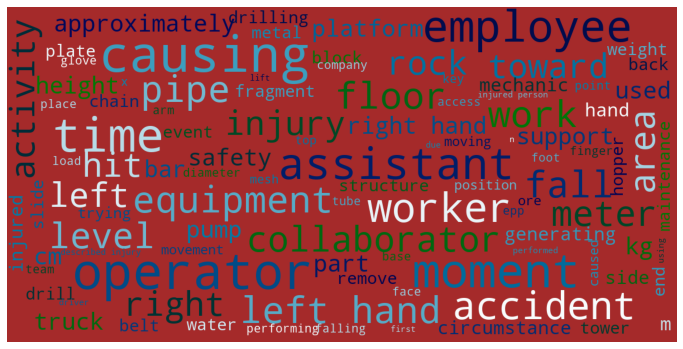

dict_keys(['causing', 'operator', 'time', 'moment', 'employee', 'assistant', 'worker', 'accident', 'work', 'equipment', 'fall', 'left hand', 'floor', 'pipe', 'area', 'collaborator', 'level', 'meter', 'injury', 'right', 'toward', 'hit', 'activity', 'rock', 'left', 'approximately', 'height', 'platform', 'right hand', 'part', 'safety', 'truck', 'support', 'kg', 'used', 'cm', 'pump', 'bar', 'circumstance', 'mechanic', 'side', 'm', 'hand', 'generating', 'injured', 'fragment', 'end', 'drilling', 'plate', 'drill', 'structure', 'block', 'weight', 'back', 'remove', 'maintenance', 'belt', 'hopper', 'water', 'event', 'metal', 'slide', 'chain', 'tower', 'trying', 'position', 'ore', 'movement', 'caused', 'moving', 'performing', 'finger', 'point', 'falling', 'mesh', 'epp', 'tube', 'company', 'access', 'team', 'load', 'face', 'x', 'arm', 'key', 'base', 'foot', 'top', 'diameter', 'place', 'glove', 'described injury', 'injured person', 'driver', 'lift', 'first', 'using', 'performed', 'due', 'n'])

Pote

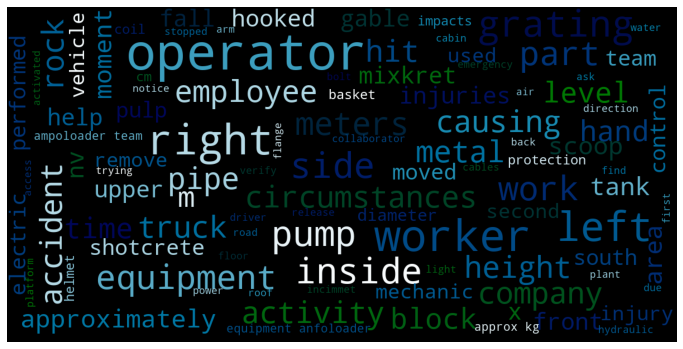

dict_keys(['operator', 'worker', 'right', 'left', 'grating', 'side', 'pump', 'inside', 'equipment', 'part', 'work', 'meters', 'rock', 'accident', 'pipe', 'activity', 'causing', 'circumstances', 'hit', 'height', 'company', 'truck', 'employee', 'metal', 'm', 'time', 'level', 'block', 'hand', 'approximately', 'area', 'moment', 'scoop', 'tank', 'nv', 'mixkret', 'help', 'injuries', 'front', 'upper', 'gable', 'x', 'hooked', 'fall', 'shotcrete', 'moved', 'performed', 'pulp', 'south', 'control', 'team', 'electric', 'mechanic', 'vehicle', 'remove', 'injury', 'second', 'used', 'diameter', 'protection', 'cm', 'impacts', 'helmet', 'basket', 'coil', 'equipment anfoloader', 'approx kg', 'ampoloader team', 'release', 'due', 'water', 'roof', 'verify', 'ask', 'emergency', 'activated', 'collaborator', 'flange', 'air', 'first', 'incimmet', 'direction', 'plant', 'cabin', 'cables', 'power', 'floor', 'driver', 'find', 'light', 'notice', 'trying', 'stopped', 'arm', 'road', 'bolt', 'hydraulic', 'platform', 'a

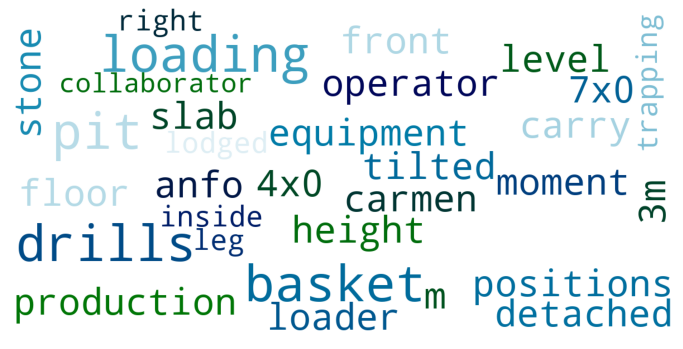

dict_keys(['loading', 'drills', 'pit', 'basket', 'process', 'carmen', 'level', 'operator', 'positions', 'anfo', 'loader', 'equipment', 'height', '3m', 'floor', 'carry', 'production', 'moment', 'stone', 'slab', '4x0', '7x0', 'm', 'detached', 'front', 'tilted', 'lodged', 'inside', 'trapping', 'right', 'leg', 'collaborator'])


In [29]:
#function call for word cloud & print each Potential Accident Level words

bg_color=['gold','orange','silver','brown','black','white']   

# cloud={}
for i in range(0,6):  
   corpus=[]
   print('\nPotential Accident Level: ',i)
   for j in data[data['Potential Accident Level']==i].index:
       corpus= ' '.join([data['Description'][j],str(corpus)])
   show_wordcloud(corpus,bg_color[i])

In [30]:
#drop if any duplicate records in the given dataset
# data.drop_duplicates(inplace=True)
# print("Total no. of records after removing duplicates:",len(data))

* since, per analysis dataset has unqiue 425 records. However like record number (39 & 40, 389 & 390,..) have the same descriptions but differnt values on other attributes
* Hence not removing the duplicates with commands

#### ‣ Step 4: Data preparation to be used for AIML model learning

In [31]:
data.head(2)

,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,year,month,date,Type_is_Country_01,Type_is_Country_02,Type_is_Country_03,Etype_is_Employee,Etype_is_Third Party,Etype_is_Third Party (Remote)
0,0,1,0,3,1,Third Party,20,While removing the drill rod of the Jumbo 08 f...,2016,1,1,1,0,0,0,1,0
1,1,1,0,3,1,Employee,21,During the activation of a sodium sulphide pum...,2016,1,2,0,1,0,1,0,0


* import the required field for further NLP processing & model generation

In [32]:
data[['Description','Potential Accident Level']].to_csv("milestone1_dataset.csv",index=False)

In [33]:
data_m1=pd.read_csv("milestone1_dataset.csv")

In [34]:
data_m1.head(5)

,Description,Potential Accident Level
0,While removing the drill rod of the Jumbo 08 f...,3
1,During the activation of a sodium sulphide pum...,3
2,In the sub-station MILPO located at level +170...,2
3,Being 9:45 am. approximately in the Nv. 1880 C...,0
4,Approximately at 11:45 a.m. in circumstances t...,3


## 2. Milestone

#### ‣ Input: Output of milestone 

    1 ‣ Process:
        ‣ Step 1: NLP pre processing
        ‣ Step 2: Design, train and test machine learning classifiers
        ‣ Step 3: Design, train and test Neural networks classifiers
        ‣ Step 4: Design, train and test RNN or LSTM classifiers
        ‣ Step 5: Choose the best performing model classifier and pickle it.
        ‣ Output: Pickled model to be used for future prediction
    ‣ Submission: Interim report

In [35]:
import pandas as pd
import numpy as np
data_m1=pd.read_csv("milestone1_dataset.csv")

In [36]:
#using the cleansed milestone1 data for milestone2
data=data_m1[['Potential Accident Level','Description']]

## ‣ Step 1: NLP pre processing

In [37]:
data['Potential Accident Level'].value_counts()

3    143
2    106
1     95
0     49
4     31
5      1
Name: Potential Accident Level, dtype: int64

* Lets upsample Potential Accident Level 5 dataset as there is only one record for the category 

In [38]:
#Data augmentation - Substitute word with different Synonym 
# Removing punctuations in string
# Using regex

import nlpaug
import nlpaug.augmenter.word as naw
import re

aug = naw.SynonymAug(aug_src='wordnet',aug_max=2)  
augmented_sentences=[]
augmented_sentences_labels=[]
for i in data['Description'].index:
    if data['Potential Accident Level'][i]==5:
        res=re.sub(r'[^\w\s]', '', data['Description'][i])
        temps=aug.augment(res,n=30)
        for sent in temps:
          augmented_sentences.append(sent)
          augmented_sentences_labels.append(data['Potential Accident Level'][i])

In [39]:
#sample
naw.SynonymAug(aug_src='wordnet',aug_max=2).augment("I am suffering from fever, body pain and headache",n=2)

['I am suffering from febrility, body pain and headache',
 'I am suffering from fever, torso infliction and headache']

In [40]:
data[data['Potential Accident Level']==5]

,Potential Accident Level,Description
307,5,During the process of loading drills in the Ca...


In [41]:
data1=pd.DataFrame({'Description':augmented_sentences, 'Potential Accident Level':augmented_sentences_labels})


In [42]:
data = pd.concat([data, data1], axis=0,ignore_index=True)

In [43]:
data[data['Potential Accident Level']==5]

,Potential Accident Level,Description
307,5,During the process of loading drills in the Ca...
425,5,During the process of loading drills in the Ca...
426,5,During the process of loading drills in the Ca...
427,5,During the process of loading drills in the Ca...
428,5,During the process of loading drills in the Ca...
429,5,During the process of loading drills in the Ca...
430,5,During the process of loading drills in the Ca...
431,5,During the process of loading drills in the Ca...
432,5,During the process of loading drills in the Ca...
433,5,During the process of loading drills in the Ca...


#### Pre-processing: 
    Lower case, remove special characters/ numbers, tokenization,lemmatize & removing stop words

In [44]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
from tqdm._tqdm_notebook import tqdm_notebook


nltk.download('punkt')
nltk.download('wordnet')
import string
nltk.download('stopwords')
stop=set(stopwords.words('english'))
tqdm_notebook.pandas()
def preprocess(sentence):
          sentence=str(sentence) 
          corpus=[]
          lem=WordNetLemmatizer()
          words=[w for w in word_tokenize(sentence) if (w not in stop)]         
          words=[lem.lemmatize(w) for w in words if len(w)>2]
          words = [''.join(c for c in s if c not in string.punctuation) for s in words if s]
          words = [word.lower() for word in words]
          words = [word for word in words if word.isalpha()]
          corpus.append(words) 
          return " ".join(words)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreekkanthkalyanasundaram/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shreekkanthkalyanasundaram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreekkanthkalyanasundaram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
preprocess("during college days @ USA I used to runs to the bus stops")

'college day usa used run bus stop'

In [46]:
data['cleantext']=data['Description'].progress_map(lambda s:preprocess(s))

  0%|          | 0/455 [00:00<?, ?it/s]

In [47]:
#Function definition to generate Word cloud 
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

def show_wordcloud(data,bg_color):
    wordcloud = WordCloud(
        background_color=bg_color,
        stopwords=stopwords,
        max_words=100,
        colormap='ocean_r',
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data).lower())

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
    print(wordcloud.words_.keys())

#### Remove common words from Description

In [48]:
#generate corpus for each potential accident level categories
for i in range(0, 6):
    cleancorpus=[]
    for j in data[data['Potential Accident Level']==i].index:
        cleancorpus=' '.join([data['cleantext'][j],str(cleancorpus)])
    cleancorpus = word_tokenize(str(cleancorpus))  #[2:-2] is to remove front and trailer char [' ']
    (globals()[f"cleanwords_{i}"])=cleancorpus


In [49]:
#common words sample on sample Potential Accident Level
print(cleanwords_5) #sample

['during', 'process', 'loading', 'drill', 'carmen', 'pit', 'level', 'operator', 'position', 'field', 'goal', 'anfo', 'loader', 'equipment', 'height', 'floor', 'carry', 'loading', 'production', 'drill', 'moment', 'stone', 'slab', 'detached', 'front', 'pit', 'tilted', 'lodged', 'inside', 'field', 'goal', 'trapping', 'right', 'leg', 'collaborator', 'during', 'process', 'loading', 'drill', 'carmen', 'pit', 'level', 'operator', 'position', 'basket', 'anfo', 'loader', 'equipment', 'height', 'floor', 'carry', 'loading', 'production', 'drill', 'moment', 'stone', 'slab', 'detached', 'front', 'pit', 'tilted', 'lodged', 'inside', 'basket', 'trap', 'right', 'leg', 'collaborator', 'during', 'process', 'loading', 'drill', 'carmen', 'nether', 'region', 'level', 'operator', 'position', 'basket', 'anfo', 'loader', 'equipment', 'height', 'floor', 'carry', 'loading', 'production', 'drill', 'moment', 'stone', 'slab', 'detached', 'front', 'pit', 'tilted', 'lodged', 'inside', 'basket', 'trapping', 'right', 

In [50]:
#function to get the common words
from nltk.tokenize import sent_tokenize, word_tokenize


def common_words(a,b,c,d,e,f):
  union_corpus = set.union(set(a),set(b),set(c),set(d),set(e),set(f))
  intersection_corpus = set.intersection(set(union_corpus),set(a),set(b),set(c),set(d),set(e),set(f))
  k=intersection_corpus
  return k
  


#tokenize each documents of 'potential Accident level' categories   
words_5 = word_tokenize(str(cleanwords_5))
words_4 = word_tokenize(str(cleanwords_4))
words_3 = word_tokenize(str(cleanwords_3))
words_2 = word_tokenize(str(cleanwords_2))
words_1 = word_tokenize(str(cleanwords_1))
words_0 = word_tokenize(str(cleanwords_0))

common_wordlist=list(common_words(words_0,words_1,words_2,words_3,words_4,words_5))
print(common_wordlist)

["'moment", '[', "'right", "'loading", "'operator", "'during", "'leg", "'floor", "'", "'rock", "'collaborator", "'height", "'front", ']', "'level", "'equipment", ',', "'inside"]


* Above are the common words present on the Description

In [51]:
#function to clean/ preprocess - generate corpus for each potential accident level categories
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
def clean_preprocess(sentence,class_stopwords):   
    sentence=str(sentence)
    words = tokenizer.tokenize(sentence)           # tokenization only the word characters
    words = [w for w in words if w not in class_stopwords]
    return " ".join(words)

In [52]:
#generate corpus for each potential accident level categories
from tqdm import tqdm
for i in range(0, 6):
    cleancorpus=[]
    for j in tqdm(data[data['Potential Accident Level']==i].index):
        if j < 425:
         data['cleantext'][j]=clean_preprocess(data['cleantext'][j],common_wordlist)

100%|██████████| 31/31 [00:00<00:00, 71402.21it/s]


In [53]:
#copying records
data['preprocesstext']=data['cleantext']

In [54]:
data.head(2)

,Potential Accident Level,Description,cleantext,preprocesstext
0,3,While removing the drill rod of the Jumbo 08 f...,while removing drill rod jumbo maintenance sup...,while removing drill rod jumbo maintenance sup...
1,3,During the activation of a sodium sulphide pum...,during activation sodium sulphide pump piping ...,during activation sodium sulphide pump piping ...


In [55]:
#function to get the common words per Potential Accident Level
def cleancommon_words(a,b,c,d,e,f):
  union_corpus = set.union(set(a),set(b),set(c),set(d),set(e))
  intersection_corpus = set.intersection(set(union_corpus),set(f))
  k=set(intersection_corpus)
  return k
  
cleancommon_wordlist0=list(cleancommon_words(cleanwords_1,cleanwords_2,cleanwords_3,cleanwords_4,cleanwords_5,cleanwords_0))
cleancommon_wordlist1=list(cleancommon_words(cleanwords_0,cleanwords_2,cleanwords_3,cleanwords_4,cleanwords_5,cleanwords_1))
cleancommon_wordlist2=list(cleancommon_words(cleanwords_0,cleanwords_1,cleanwords_3,cleanwords_4,cleanwords_5,cleanwords_2))
cleancommon_wordlist3=list(cleancommon_words(cleanwords_0,cleanwords_1,cleanwords_2,cleanwords_4,cleanwords_5,cleanwords_3))
cleancommon_wordlist4=list(cleancommon_words(cleanwords_0,cleanwords_1,cleanwords_2,cleanwords_3,cleanwords_5,cleanwords_4))
cleancommon_wordlist5=list(cleancommon_words(cleanwords_0,cleanwords_1,cleanwords_2,cleanwords_3,cleanwords_4,cleanwords_5))

In [56]:
data['Potential Accident Level'].value_counts()

3    143
2    106
1     95
0     49
4     31
5     31
Name: Potential Accident Level, dtype: int64

In [57]:
#generate corpus for each potential accident level categories
from tqdm import tqdm

for i in range(0, 6):
    cleancorpus=[]
    cleancommon=(globals()[f"cleancommon_wordlist{i}"])
    for j in tqdm(data[data['Potential Accident Level']==i].index):
         data['cleantext'][j]=clean_preprocess(data['cleantext'][j],cleancommon)

100%|██████████| 31/31 [00:00<00:00, 4028.61it/s]


#### Unique words in each Potential Accident Levels


Potential Accident Level:  0


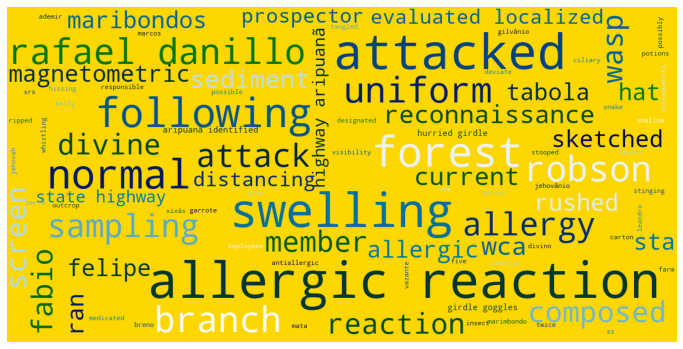

dict_keys(['allergic reaction', 'attacked', 'swelling', 'forest', 'normal', 'following', 'uniform', 'robson', 'branch', 'rafael danillo', 'sampling', 'allergy', 'attack', 'wasp', 'screen', 'reaction', 'member', 'fabio', 'composed', 'divine', 'reconnaissance', 'wca', 'current', 'sediment', 'magnetometric', 'sta', 'rushed', 'sketched', 'hat', 'maribondos', 'allergic', 'ran', 'tabola', 'felipe', 'prospector', 'distancing', 'evaluated localized', 'state highway', 'highway aripuanã', 'aripuanã identified', 'hurried girdle', 'girdle goggles', 'possibly', 'potions', 'insect', 'responsible', 'vms', 'xixás', 'stinging', 'play', 'visibility', 'hissing', 'ripped', 'tangled', 'gilvânio', 'antiallergic', 'designated', 'twice', 'employees', 'medicated', 'marcos', 'stooped', 'deviate', 'whistling', 'ademir', 'five', 'vazante', 'mata', 'serra', 'garrote', 'srs', 'leandro', 'jehovânio', 'shallow', 'carton', 'possible', 'looking', 'ss', 'breno', 'consequently', 'belly', 'jehovah', 'farm', 'lázaro', 'div

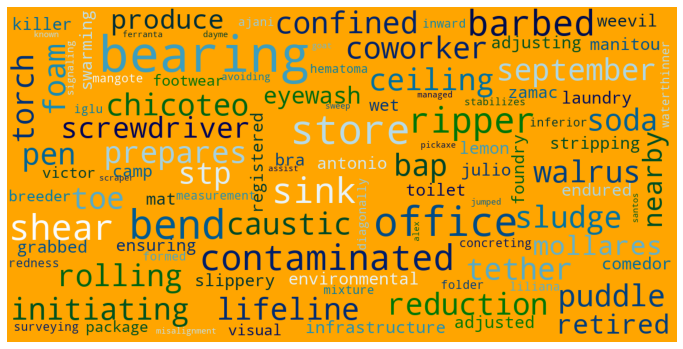

dict_keys(['bearing', 'office', 'store', 'bend', 'barbed', 'contaminated', 'sink', 'shear', 'ripper', 'tether', 'lifeline', 'toe', 'chicoteo', 'rolling', 'prepares', 'reduction', 'walrus', 'foam', 'bap', 'caustic', 'soda', 'initiating', 'ceiling', 'september', 'sludge', 'stp', 'coworker', 'puddle', 'torch', 'pen', 'confined', 'screwdriver', 'produce', 'retired', 'mollares', 'nearby', 'eyewash', 'camp', 'grabbed', 'laundry', 'stripping', 'environmental', 'swarming', 'weevil', 'endured', 'infrastructure', 'julio', 'toilet', 'bra', 'comedor', 'lemon', 'adjusted', 'registered', 'killer', 'manitou', 'ensuring', 'mat', 'wet', 'slippery', 'antonio', 'adjusting', 'foundry', 'zamac', 'package', 'footwear', 'victor', 'visual', 'breeder', 'surveying', 'measurement', 'concreting', 'mangote', 'inferior', 'hematoma', 'waterthinner', 'mixture', 'redness', 'formed', 'ajani', 'liliana', 'folder', 'iglu', 'diagonally', 'inward', 'stabilizes', 'avoiding', 'signaling', 'misalignment', 'scraper', 'santos',

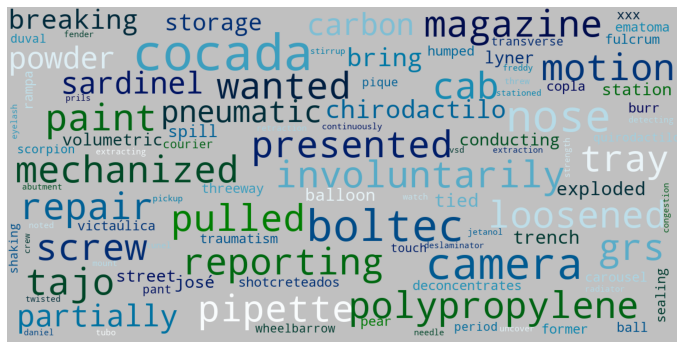

dict_keys(['cocada', 'boltec', 'nose', 'camera', 'magazine', 'presented', 'tray', 'pipette', 'grs', 'motion', 'screw', 'involuntarily', 'paint', 'polypropylene', 'pulled', 'wanted', 'reporting', 'cab', 'tajo', 'mechanized', 'repair', 'loosened', 'pneumatic', 'partially', 'powder', 'sardinel', 'carbon', 'breaking', 'chirodactilo', 'bring', 'storage', 'exploded', 'trench', 'tied', 'conducting', 'station', 'spill', 'street', 'josé', 'lyner', 'volumetric', 'balloon', 'rampa', 'xxx', 'carousel', 'deconcentrates', 'victaúlica', 'copla', 'former', 'ematoma', 'threeway', 'pear', 'sealing', 'fulcrum', 'traumatism', 'shotcreteados', 'ball', 'humped', 'burr', 'quirodactilo', 'duval', 'courier', 'pique', 'transverse', 'wheelbarrow', 'shaking', 'pant', 'scorpion', 'touch', 'period', 'continuously', 'extracting', 'vsd', 'freddy', 'mount', 'pickup', 'daniel', 'strength', 'threw', 'eyelash', 'needle', 'retraction', 'twisted', 'tunel', 'stationed', 'abutment', 'stirrup', 'noted', 'watch', 'extraction',

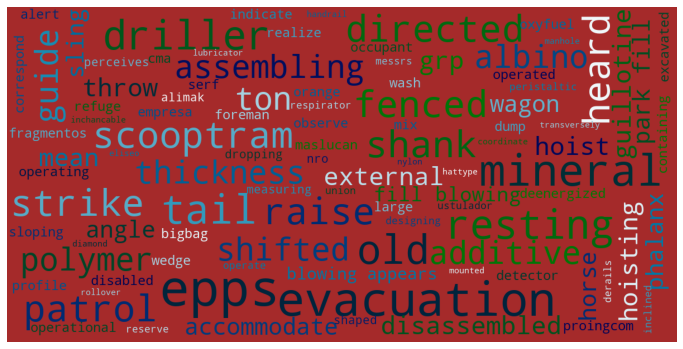

dict_keys(['epps', 'evacuation', 'mineral', 'driller', 'old', 'tail', 'resting', 'heard', 'directed', 'fenced', 'scooptram', 'raise', 'strike', 'shank', 'patrol', 'assembling', 'ton', 'additive', 'shifted', 'guide', 'polymer', 'albino', 'thickness', 'disassembled', 'external', 'throw', 'mean', 'hoisting', 'hoist', 'grp', 'guillotine', 'accommodate', 'phalanx', 'horse', 'sling', 'angle', 'wagon', 'park fill', 'fill blowing', 'blowing appears', 'sloping', 'empresa', 'serf', 'cma', 'operational', 'excavated', 'occupant', 'dump', 'large', 'wash', 'operated', 'observe', 'wedge', 'mix', 'realize', 'maslucan', 'fragmentos', 'operating', 'disabled', 'deenergized', 'profile', 'oxyfuel', 'proingcom', 'foreman', 'indicate', 'refuge', 'orange', 'alert', 'detector', 'correspond', 'containing', 'bigbag', 'perceives', 'shaped', 'measuring', 'nro', 'alimak', 'dropping', 'peristaltic', 'reserve', 'operate', 'designing', 'derails', 'messrs', 'inclined', 'union', 'respirator', 'ustulador', 'transversely'

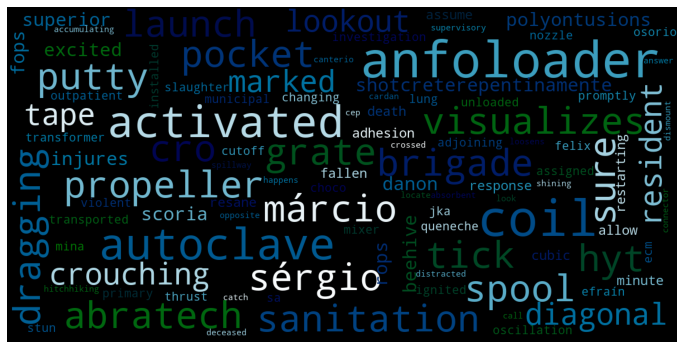

dict_keys(['anfoloader', 'coil', 'activated', 'autoclave', 'launch', 'brigade', 'márcio', 'sérgio', 'spool', 'pocket', 'sanitation', 'cro', 'visualizes', 'propeller', 'sure', 'abratech', 'putty', 'hyt', 'tick', 'dragging', 'grate', 'diagonal', 'crouching', 'marked', 'tape', 'lookout', 'resident', 'shotcreterepentinamente', 'superior', 'injures', 'rops', 'fops', 'polyontusions', 'scoria', 'beehive', 'excited', 'danon', 'resane', 'cubic', 'minute', 'allow', 'adhesion', 'restarting', 'assume', 'fallen', 'response', 'death', 'investigation', 'efraín', 'osorio', 'felix', 'mina', 'installed', 'nozzle', 'lung', 'violent', 'stun', 'slaughter', 'choco', 'jka', 'promptly', 'transported', 'outpatient', 'municipal', 'mixer', 'ecm', 'sa', 'transformer', 'oscillation', 'queneche', 'adjoining', 'assigned', 'changing', 'primary', 'cutoff', 'unloaded', 'ignited', 'thrust', 'accumulating', 'dismount', 'look', 'shining', 'deceased', 'supervisory', 'locate', 'answer', 'call', 'distracted', 'happens', 'hit

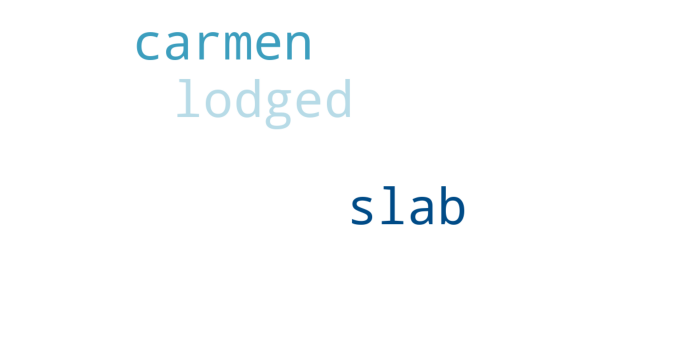

dict_keys(['carmen', 'slab', 'lodged'])


In [58]:
#function call for word cloud & print the unique words on each class (Potential Accident Level)

bg_color=['gold','orange','silver','brown','black','white']   

# cloud={}
for i in range(0,6):  
   corpus=[]
   print('\nPotential Accident Level: ',i)
   for j in data[data['Potential Accident Level']==i].index:
       if j < 425:                                            #to filter the upsampled data
        corpus= ' '.join([data['cleantext'][j],str(corpus)])
   show_wordcloud(corpus,bg_color[i])

In [59]:
import random
for x in [1,2]:
    i=random.randint(0,len(data))
    print("Potential Accident Level: ",data['Potential Accident Level'][i])
    print("---"*10)
    print(" ")
    print("Given:\n ",data['Description'][i])
    print(" ")
    print("preprocessed:\n ",data['preprocesstext'][i])
    print(" ")
    print("Unique words:\n ",data['cleantext'][i])
    print("===="*25,"\n")

Potential Accident Level:  0
------------------------------
 
Given:
  The Geologo and the auxiliary Elismar traveled to evaluate geological points following the GPS near some drainage. Following the state highway that gives access to the Aripuanã area, they stopped and got out of the vehicle to see the point identified in the GPS, Renato, when distancing himself about seven meters from the vehicle following the road, was surprised by four bites of thorns on his face and neck. Quickly he hurried back to the vehicle, moving away from the place. The clerk was wearing a girdle and goggles, he still was not wearing gloves, as he would not enter the forest area. There was no allergic reaction.
 
preprocessed:
  the geologo auxiliary elismar traveled evaluate geological point following gps near drainage following state highway give access aripuanã area stopped got vehicle see point identified gps renato distancing seven meter vehicle following road surprised four bite thorn face neck quickly

#### word frequency count/ percentage

In [60]:
corpuslen=0
for i in data['preprocesstext']:
    corpuslen+=len(str(i).split())
print("corpus word frequency: ",corpuslen) 

#word frequency
for i in range(0,6):  
   corpus=[]
   documentlen=0
   for j in data[data['Potential Accident Level']==i].index:
      if j < 425:
        corpus.append(data['preprocesstext'][j])   
   documentlen+=len(str(corpus).split())
   print('\nPercentage word share of Potential Accident Level',i ,"- {:.2f}".format((documentlen/corpuslen)*100),"%")


corpus word frequency:  15049

Percentage word share of Potential Accident Level 0 - 13.16 %

Percentage word share of Potential Accident Level 1 - 17.07 %

Percentage word share of Potential Accident Level 2 - 19.37 %

Percentage word share of Potential Accident Level 3 - 35.08 %

Percentage word share of Potential Accident Level 4 - 8.45 %

Percentage word share of Potential Accident Level 5 - 0.22 %


##### Tokenizer
Regular expression based tokenizers to consider only alphabetical sequences and ignore numerical sequences.

In [61]:
import re
def complaint_to_words(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

In [62]:
all_words = list()
for comp in data['preprocesstext']:
    for w in complaint_to_words(comp):
        all_words.append(w)

In [63]:
print('Size of vocabulary: {}'.format(len(set(all_words))))

Size of vocabulary: 2764


In [64]:
all_words[-10:-1]

['pit',
 'tilted',
 'lodged',
 'inside',
 'field',
 'goal',
 'trapping',
 'right',
 'leg']

In [65]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [66]:
# For Data Preprocessing
import pandas as pd

# Gensim Libraries
import gensim
from gensim.models.word2vec import Word2Vec

# For visualization of word2vec model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# Using gensim to tokenize the description words for further preprocessing
data['preprocessed_text']=data['preprocesstext'].apply(gensim.utils.simple_preprocess)
data.head()

,Potential Accident Level,Description,cleantext,preprocesstext,preprocessed_text
0,3,While removing the drill rod of the Jumbo 08 f...,centralizer facilitate accelerate tightens,while removing drill rod jumbo maintenance sup...,"[while, removing, drill, rod, jumbo, maintenan..."
1,3,During the activation of a sodium sulphide pum...,activation sulphide piping uncoupled sulfide d...,during activation sodium sulphide pump piping ...,"[during, activation, sodium, sulphide, pump, p..."
2,2,In the sub-station MILPO located at level +170...,flat beak,substation milpo located level collaborator ex...,"[substation, milpo, located, level, collaborat..."
3,0,Being 9:45 am. approximately in the Nv. 1880 C...,soquet bhb identified hexagonal cristóbal exer...,being approximately personnel begin task unloc...,"[being, approximately, personnel, begin, task,..."
4,3,Approximately at 11:45 a.m. in circumstances t...,anthony group leader eduardo eric fernándezinj...,approximately am circumstance mechanic anthony...,"[approximately, am, circumstance, mechanic, an..."


In [68]:
#Identifying the word count of processed description
num_1=[]
for a_string in data['preprocesstext']:
    word_list = a_string.split()
    number_of_words = len(word_list)
    num_1.append(number_of_words)

max(num_1)

95

In [69]:
# Custome Word2Vec Genism Model - Converting the Preprocessed description tokens to Vector using Skip Gram model(sg=1)
num_features=95
min_word_count=1
num_workers=2
window_size=3
subsampling=1e-3
model = Word2Vec(data['preprocessed_text'],workers=num_workers,sg=1,min_count=min_word_count,window=window_size,sample=subsampling)
model.init_sims(replace=True)  #training
model_name = "my_domain_specific_word2vec_model"
model.save(model_name)

   * Word Embeddings are numeric vector representations of text that also maintain the semantic and contextual relationships within the words in the text corpus.

In [70]:
from gensim.models.word2vec import Word2Vec
model_name = "my_domain_specific_word2vec_model"
model = Word2Vec.load(model_name)

In [71]:
# Check dimension of word vectors
model.vector_size

100

In [72]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model.wv[word] for word in all_words if word in model.wv.key_to_index]

# # Create a list of the words corresponding to these vectors
words_filtered = [word for word in all_words if word in model.wv.key_to_index]

# # Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# # Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
while,-0.057822,0.099280,-0.006715,0.033546,-0.011313,-0.171980,0.079198,0.256884,-0.104396,-0.093456,...,0.157378,0.073238,-0.021928,-0.016794,0.183657,0.137141,0.083328,-0.155146,0.046056,0.000635
removing,-0.052430,0.083711,-0.001959,0.033305,-0.011447,-0.187506,0.073060,0.245769,-0.113046,-0.096599,...,0.164973,0.053405,-0.027419,0.002173,0.178681,0.138233,0.078598,-0.158440,0.067275,-0.019640
drill,-0.034822,0.079641,0.029520,0.018998,-0.011541,-0.190470,0.058256,0.233862,-0.092894,-0.066733,...,0.193883,0.054879,-0.006513,0.014624,0.122045,0.128007,0.057827,-0.132491,0.043430,0.011737


#### Dimensionality Reduction with t-SNE

    t-SNE
        - Tool to visualize high-dimensional data
        - It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data

In [73]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])


In [74]:
# pip install adjustText

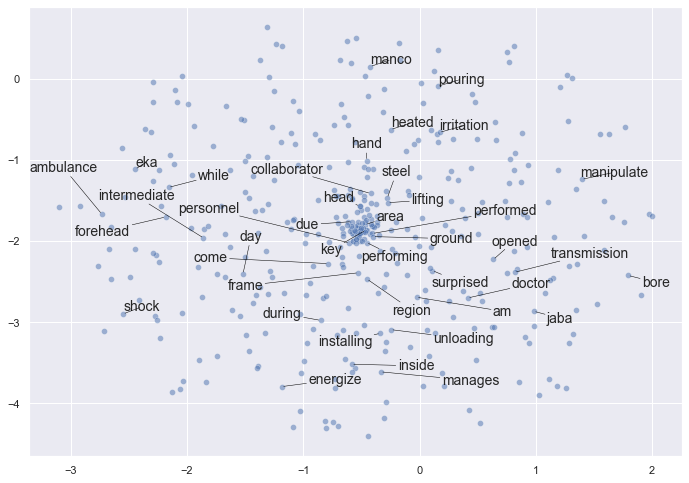

In [75]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

#### Inference:
     plot shows words are in clustered at centre [head,due,hand,area,during,inside] 
     few words [ambulance,energize, eka, irritation] are scattered across which will be the key words to help in predicitons
     

In [76]:
size=100
model.wv['environmental'].reshape((1, size))

array([[-0.05076449,  0.1772415 , -0.10753528,  0.12981868,  0.02679219,
        -0.13015251,  0.16221955,  0.15729547,  0.03224943, -0.13784488,
         0.04698612, -0.10387306, -0.09489206,  0.06974106, -0.00228423,
        -0.14050744, -0.11867598, -0.11454387,  0.12783845, -0.14497451,
         0.06267538,  0.06256062, -0.04352843,  0.05358588,  0.11543589,
         0.00312716, -0.11068182, -0.06703286, -0.09158367,  0.0763928 ,
         0.1164101 , -0.08250939, -0.07737121, -0.0774162 , -0.11428768,
         0.09374666, -0.03080539, -0.08150949, -0.15552601, -0.20765227,
         0.09427729, -0.181292  , -0.00542785, -0.06797235,  0.0858492 ,
         0.07763291, -0.06774022,  0.07002513, -0.05333362,  0.07283766,
        -0.07373623, -0.06898086, -0.07389572, -0.05826508, -0.13791741,
         0.08855057,  0.15358473, -0.00916375, -0.01496655, -0.04653169,
        -0.06529747,  0.02256816, -0.04999186, -0.00313714, -0.17249468,
         0.17707323,  0.09317067,  0.14006278,  0.0

In [77]:
np.set_printoptions(formatter={'float':'{:0.2f}'.format})

In [78]:
def document_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    doc = [word for word in words if word in model.wv.key_to_index]
#     print("===",np.mean(model.wv[words], axis=0))
#     print("===",np.mean(model.wv[doc], axis=0))
    return np.mean(model.wv[doc], axis=0)

In [79]:
x = []
for words in data['preprocessed_text']: # append the vector for each document

    x.append(document_vector(model, words))
data_list = np.array(x) # list to array

In [81]:
data_list.shape

(455, 100)

In [82]:
# concatenate the vectors to the dataset
data_list=pd.DataFrame(data_list)
data_1=pd.concat([data.reset_index(drop=True), data_list.reset_index(drop=True)], axis=1)

In [83]:
data_1.head(2)

,Potential Accident Level,Description,cleantext,preprocesstext,preprocessed_text,0,1,2,3,4,...,90,91,92,93,94,95,96,97,98,99
0,3,While removing the drill rod of the Jumbo 08 f...,centralizer facilitate accelerate tightens,while removing drill rod jumbo maintenance sup...,"[while, removing, drill, rod, jumbo, maintenan...",-0.051227,0.084640,0.000207,0.023966,-0.009393,...,0.164128,0.058221,-0.016666,0.008900,0.167123,0.131741,0.074594,-0.151654,0.055274,-0.015448
1,3,During the activation of a sodium sulphide pum...,activation sulphide piping uncoupled sulfide d...,during activation sodium sulphide pump piping ...,"[during, activation, sodium, sulphide, pump, p...",-0.057766,0.083784,0.011843,0.025843,-0.014934,...,0.148702,0.056793,-0.031471,0.006432,0.155168,0.134964,0.072062,-0.150910,0.047488,-0.012230


In [84]:
data_1.drop(["Description","cleantext","preprocesstext","preprocessed_text"], axis=1, inplace=True)

In [85]:
# pd.options.display.float_format = "{:,.2f}".format # float values to 2 decimal values

In [86]:
data_1.head()

,Potential Accident Level,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,3,-0.051227,0.084640,0.000207,0.023966,-0.009393,-0.195789,0.073653,0.235352,-0.118588,...,0.164128,0.058221,-0.016666,0.008900,0.167123,0.131741,0.074594,-0.151654,0.055274,-0.015448
1,3,-0.057766,0.083784,0.011843,0.025843,-0.014934,-0.174377,0.070952,0.222473,-0.100741,...,0.148702,0.056793,-0.031471,0.006432,0.155168,0.134964,0.072062,-0.150910,0.047488,-0.012230
2,2,-0.053946,0.082449,-0.004536,0.028894,-0.007251,-0.194677,0.075830,0.243933,-0.109813,...,0.158755,0.059278,-0.019107,0.008618,0.164577,0.131653,0.077882,-0.147810,0.057704,-0.026926
3,0,-0.052827,0.086006,0.004465,0.025327,-0.007647,-0.189444,0.076437,0.232671,-0.120193,...,0.152432,0.055364,-0.017612,0.004013,0.163153,0.135180,0.074876,-0.145583,0.051008,-0.018997
4,3,-0.049342,0.080150,0.007055,0.025196,-0.013177,-0.195350,0.073155,0.238740,-0.116594,...,0.160178,0.053721,-0.013698,0.000683,0.164226,0.134119,0.069511,-0.152585,0.056897,-0.023521


In [87]:
data_1.to_csv("milestone2_dataset.csv",index=False)

## 2. Milestone 2: 
    ‣ Input: Output of milestone 
    1 ‣ Process:
        ‣ Step 1: NLP pre processing
        ‣ Step 2: Design, train and test machine learning classifiers
        ‣ Step 3: Design, train and test Neural networks classifiers
        ‣ Step 4: Design, train and test RNN or LSTM classifiers
        ‣ Step 5: Choose the best performing model classifier and pickle it.
    ‣ Output: Pickled model to be used for future prediction
    ‣ Submission: Interim report

## Machine learning classifiers

#### train-test split

In [88]:
Y = data_1['Potential Accident Level']
X = data_1.drop(['Potential Accident Level'], axis=1) 

In [89]:
Y.value_counts()

3    143
2    106
1     95
0     49
4     31
5     31
Name: Potential Accident Level, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [91]:
### Normalize the train and test data

In [92]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('Y_train shape : ({0},)'.format(Y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('Y_test shape : ({0},)'.format(Y_test.shape[0]))

X_train shape : (318,100)
Y_train shape : (318,)
X_test shape : (137,100)
Y_test shape : (137,)


In [93]:
X_train[0]

109   -0.050895
342   -0.049824
159   -0.050366
313   -0.059554
370   -0.052181
         ...   
317   -0.048378
23    -0.058030
212   -0.045556
409   -0.044699
50    -0.054915
Name: 0, Length: 318, dtype: float32

####      Perform relevant sequence adding on the data

In [94]:
# #padding
# # limit the maximum review length to max_words by truncating longer reviews and padding shorter reviews with a null value (0) using the pad_sequences() function in Keras?
# from tensorflow.keras.preprocessing import sequence  #Pads sequences to the same length
# max_review_length = 100
# X_train = sequence.pad_sequences(X_train.values.tolist(), maxlen=max_review_length)
# X_test = sequence.pad_sequences(X_test.values.tolist(), maxlen=max_review_length)

####        ‣ Step 2: Design, train and test machine learning classifiers

## LogisticRegression

In [95]:
# X_train.describe

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(X_train,Y_train)
pred = LogisticRegression_model.predict(X_test)
print("\nAccuracy Score LogReg: ",accuracy_score(Y_test,pred)*100,'\n')
print('Confusion matrix:', confusion_matrix(Y_test,pred),'\n')
print('Classification report:',classification_report(Y_test,pred))


Accuracy Score LogReg:  31.386861313868614 

Confusion matrix: [[ 0  0  0 15  0  0]
 [ 0  0  0 29  0  0]
 [ 0  0  0 32  0  0]
 [ 0  0  0 43  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  0  9  0  0]] 

Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        29
           2       0.00      0.00      0.00        32
           3       0.31      1.00      0.48        43
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         9

    accuracy                           0.31       137
   macro avg       0.05      0.17      0.08       137
weighted avg       0.10      0.31      0.15       137



#### Model output:
          Overall 35.3% Accuracy. This can't be used as a predictive model 

## Naive-Bayes

In [97]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
clf = BernoulliNB()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("\nAccuracy Score NB: ",accuracy_score(Y_test,pred)*100,'\n')
print('Confusion matrix:', confusion_matrix(Y_test,pred),'\n')
print('Classification report:',classification_report(Y_test,pred),'\n')


Accuracy Score NB:  35.76642335766424 

Confusion matrix: [[ 0  0  1 14  0  0]
 [ 0  1  6 22  0  0]
 [ 0  1  9 22  0  0]
 [ 0  0  5 38  0  0]
 [ 0  0  2  7  0  0]
 [ 0  0  0  8  0  1]] 

Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.50      0.03      0.06        29
           2       0.39      0.28      0.33        32
           3       0.34      0.88      0.49        43
           4       0.00      0.00      0.00         9
           5       1.00      0.11      0.20         9

    accuracy                           0.36       137
   macro avg       0.37      0.22      0.18       137
weighted avg       0.37      0.36      0.26       137
 



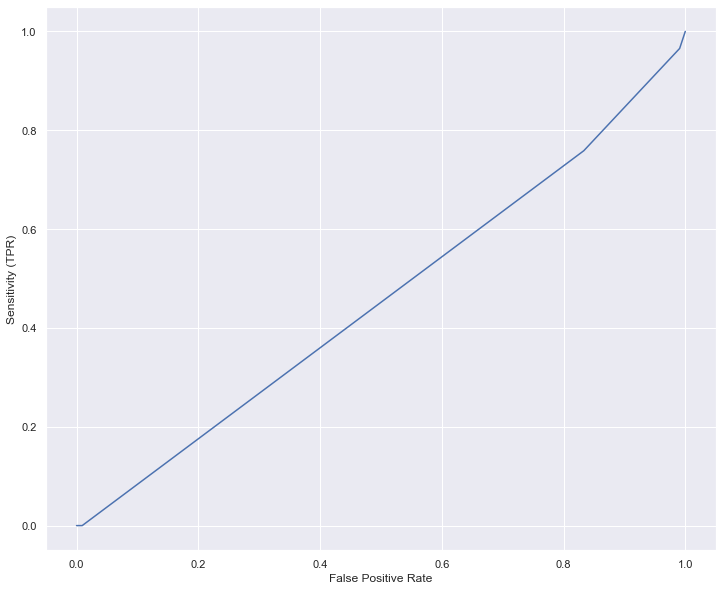

In [98]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(Y_test,pred, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
plt.figure(figsize=(12,10))
sns.lineplot(x=fpr,y=tpr,);

plt.xlabel("False Positive Rate");
plt.ylabel("Sensitivity (TPR)");

#### Model output:
          Overall 36% Accuracy. This can't be used as a predictive model 

## RandomForestClassifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("\nAccuracy Score NB: ",accuracy_score(Y_test,pred)*100,'\n')
print('Confusion matrix:', confusion_matrix(Y_test,pred),'\n')
print('Classification report:',classification_report(Y_test,pred),'\n')


Accuracy Score NB:  48.9051094890511 

Confusion matrix: [[ 6  3  1  5  0  0]
 [ 0 10  5 14  0  0]
 [ 0  6 10 16  0  0]
 [ 0  7  6 30  0  0]
 [ 1  0  1  5  2  0]
 [ 0  0  0  0  0  9]] 

Classification report:               precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.38      0.34      0.36        29
           2       0.43      0.31      0.36        32
           3       0.43      0.70      0.53        43
           4       1.00      0.22      0.36         9
           5       1.00      1.00      1.00         9

    accuracy                           0.49       137
   macro avg       0.68      0.50      0.53       137
weighted avg       0.54      0.49      0.48       137
 



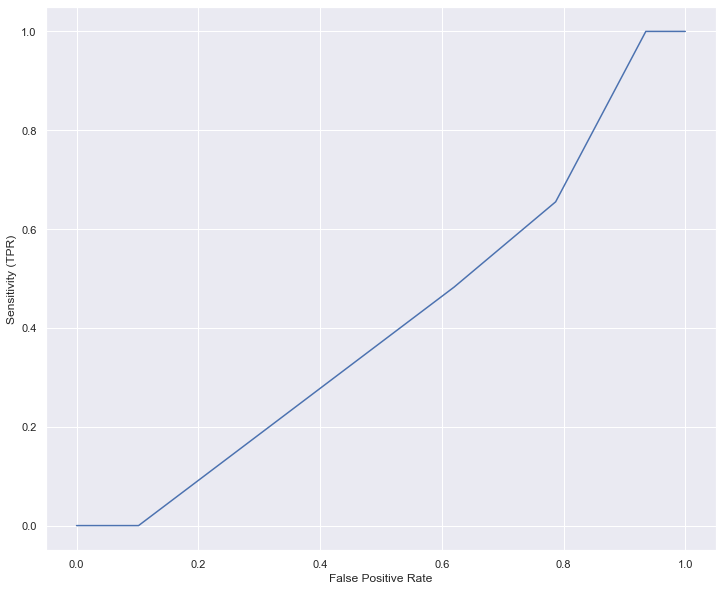

In [100]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(Y_test,pred, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
plt.figure(figsize=(12,10))
sns.lineplot(x=fpr,y=tpr,);

plt.xlabel("False Positive Rate");
plt.ylabel("Sensitivity (TPR)");

In [101]:
# from sklearn.metrics import roc_auc_score
# roc_curve(Y_test,pred, pos_label=1)

#### Model output:
          Overall 49% Accuracy. This is better then the other 3 models

####        ‣ Step 3: Design, train and test Neural networks classifiers

# ANN

In [102]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD


In [103]:
data_1.head(1)

,Potential Accident Level,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,3,-0.051227,0.08464,0.000207,0.023966,-0.009393,-0.195789,0.073653,0.235352,-0.118588,...,0.164128,0.058221,-0.016666,0.0089,0.167123,0.131741,0.074594,-0.151654,0.055274,-0.015448


In [104]:
from sklearn.model_selection import train_test_split
X = data_1.drop(['Potential Accident Level'], axis=1) 
Y=pd.get_dummies(data_1['Potential Accident Level']).values

print('X shape : ({0},{1})'.format(X.shape[0], X.shape[1]))
print('Y shape : ({0},)'.format(Y.shape[0]))




X shape : (455,100)
Y shape : (455,)


In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('Y_train shape : ({0},)'.format(Y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('Y_test shape : ({0},)'.format(Y_test.shape[0]))

X_train shape : (364,100)
Y_train shape : (364,)
X_test shape : (91,100)
Y_test shape : (91,)


In [106]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [107]:
# simple early stopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [108]:
#Initialising ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=128,activation="relu"))
ann.add(BatchNormalization())
ann.add(Dropout(0.2))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=64,activation="relu"))
ann.add(BatchNormalization())
ann.add(Dropout(0.2))

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=6,activation="softmax"))

#Compiling ANN
ann.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'],callback=[es])

In [109]:
#Fitting ANN
history = ann.fit(X_train,Y_train, validation_data=(X_test, Y_test),batch_size=32,epochs = 10)

Train on 364 samples, validate on 91 samples
Epoch 1/10
364/364 [==============================] - 1s 4ms/sample - loss: 2.2303 - accuracy: 0.2170 - val_loss: 1.9561 - val_accuracy: 0.1538
Epoch 2/10
364/364 [==============================] - 0s 288us/sample - loss: 1.7615 - accuracy: 0.2995 - val_loss: 1.8263 - val_accuracy: 0.1868
Epoch 3/10
364/364 [==============================] - 0s 293us/sample - loss: 1.5373 - accuracy: 0.4038 - val_loss: 1.7551 - val_accuracy: 0.2857
Epoch 4/10
364/364 [==============================] - 0s 295us/sample - loss: 1.4445 - accuracy: 0.4423 - val_loss: 1.7085 - val_accuracy: 0.2967
Epoch 5/10
364/364 [==============================] - 0s 295us/sample - loss: 1.2728 - accuracy: 0.5275 - val_loss: 1.6642 - val_accuracy: 0.3077
Epoch 6/10
364/364 [==============================] - 0s 295us/sample - loss: 1.1346 - accuracy: 0.5769 - val_loss: 1.6173 - val_accuracy: 0.3077
Epoch 7/10
364/364 [==============================] - 0s 292us/sample - loss: 1.0

In [110]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  12928     
_________________________________________________________________
batch_normalization (BatchNo multiple                  512       
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  8256      
_________________________________________________________________
batch_normalization_1 (Batch multiple                  256       
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  3

In [111]:
_, train_acc = ann.evaluate(X_train, Y_train, verbose=0)
_, test_acc = ann.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.854, Test: 0.330


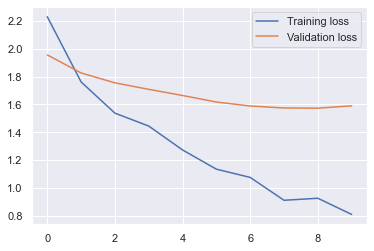

In [112]:
# plot loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.show()

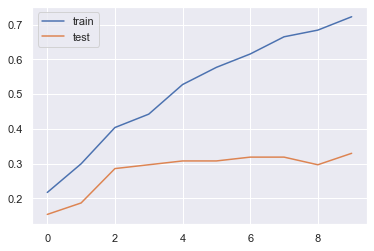

In [113]:
from matplotlib import pyplot

pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [114]:
y_pred=ann.predict_classes(X_test)
y_test=np.argmax(Y_test, axis=1)

In [115]:
from sklearn.metrics import classification_report


print("\nAccuracy Score ANN: ",accuracy_score(y_test,y_pred)*100,'\n')
print('Confusion matrix:', confusion_matrix(y_test,y_pred),'\n')
print('Classification report:',classification_report(y_test,y_pred),'\n')


Accuracy Score ANN:  32.967032967032964 

Confusion matrix: [[2 1 2 4 0 1]
 [1 5 3 8 1 1]
 [0 7 8 6 0 0]
 [2 6 7 9 4 1]
 [0 2 3 1 0 0]
 [0 0 0 0 0 6]] 

Classification report:               precision    recall  f1-score   support

           0       0.40      0.20      0.27        10
           1       0.24      0.26      0.25        19
           2       0.35      0.38      0.36        21
           3       0.32      0.31      0.32        29
           4       0.00      0.00      0.00         6
           5       0.67      1.00      0.80         6

    accuracy                           0.33        91
   macro avg       0.33      0.36      0.33        91
weighted avg       0.32      0.33      0.32        91
 



<AxesSubplot:>

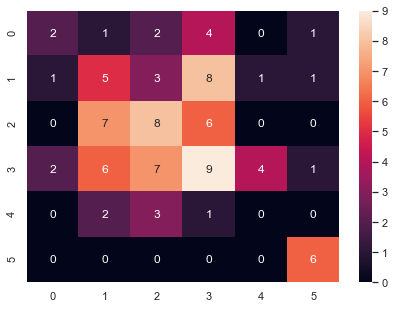

In [116]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# print(ann.evaluate(X_test, Y_test))
# y_predict = ann.predict(X_test)
# y_predict = (y_predict > 0.5) 


# cm = metrics.confusion_matrix(Y_test,y_predict, labels = [1,2,3,4,5,6])



# y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm , index = [i for i in [0,1,2,3,4,5]],#["I", "II","III","IV","V","VI"]],
                     columns = [i for i in [0,1,2,3,4,5]])#["I","II","III","IV","V","VI"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

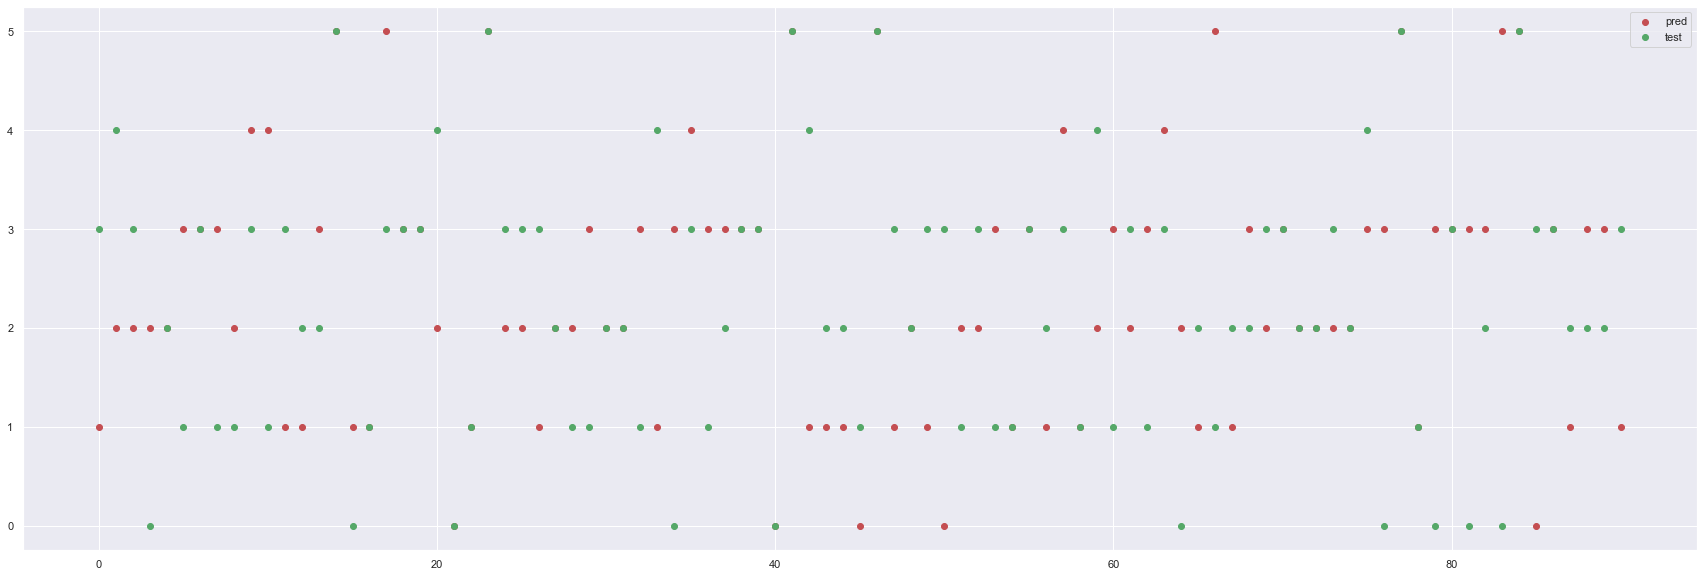

In [117]:
plt.figure(figsize=(30,10))
plt.scatter(range(len(y_pred)),y_pred,c='r', label='pred')
plt.scatter(range(len(y_test)),y_test,c='g', label='test')
plt.legend()
plt.show()

#### Inference
            ANN provides accuracy of 32% which is insufficient to be a predictive model

####        ‣ Step 4: Design, train and test RNN or LSTM classifiers

## LSTM

In [118]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('Y_train shape : ({0},)'.format(Y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('Y_test shape : ({0},)'.format(Y_test.shape[0]))

X_train shape : (364,100)
Y_train shape : (364,)
X_test shape : (91,100)
Y_test shape : (91,)


In [119]:
len(set(all_words))

2764

In [120]:
import numpy as np
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD



# create and fit the LSTM network
model = Sequential()
model.add(LSTM(128, input_shape=(1,100),return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(64))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(6,activation='softmax',kernel_regularizer = regularizers.l2(0.0015650011028133052)))
# adam = optimizers.Adam(lr =0.003315453879813377)
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics = ['accuracy'],callbacks = [EarlyStopping(monitor='val_acc', patience=2)])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            117248    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                

In [122]:
history=model.fit(X_train, Y_train, epochs = 100,validation_data =(X_test, Y_test) , batch_size=32, verbose = 2)

Train on 364 samples, validate on 91 samples
Epoch 1/100
364/364 - 4s - loss: 1.7999 - accuracy: 0.2170 - val_loss: 1.7725 - val_accuracy: 0.3187
Epoch 2/100
364/364 - 0s - loss: 1.7529 - accuracy: 0.3104 - val_loss: 1.7182 - val_accuracy: 0.3187
Epoch 3/100
364/364 - 0s - loss: 1.7028 - accuracy: 0.3104 - val_loss: 1.6785 - val_accuracy: 0.3187
Epoch 4/100
364/364 - 0s - loss: 1.6774 - accuracy: 0.3132 - val_loss: 1.6520 - val_accuracy: 0.3187
Epoch 5/100
364/364 - 0s - loss: 1.6585 - accuracy: 0.3132 - val_loss: 1.6356 - val_accuracy: 0.3187
Epoch 6/100
364/364 - 0s - loss: 1.6390 - accuracy: 0.3132 - val_loss: 1.6222 - val_accuracy: 0.3187
Epoch 7/100
364/364 - 0s - loss: 1.6147 - accuracy: 0.3132 - val_loss: 1.6088 - val_accuracy: 0.3187
Epoch 8/100
364/364 - 0s - loss: 1.6280 - accuracy: 0.3159 - val_loss: 1.5980 - val_accuracy: 0.3187
Epoch 9/100
364/364 - 0s - loss: 1.6000 - accuracy: 0.3187 - val_loss: 1.5851 - val_accuracy: 0.3187
Epoch 10/100
364/364 - 0s - loss: 1.6009 - acc

Epoch 81/100
364/364 - 0s - loss: 0.8536 - accuracy: 0.6978 - val_loss: 1.6741 - val_accuracy: 0.3407
Epoch 82/100
364/364 - 0s - loss: 0.8498 - accuracy: 0.6621 - val_loss: 1.7066 - val_accuracy: 0.3516
Epoch 83/100
364/364 - 0s - loss: 0.8290 - accuracy: 0.6951 - val_loss: 1.7130 - val_accuracy: 0.3516
Epoch 84/100
364/364 - 0s - loss: 0.8239 - accuracy: 0.6786 - val_loss: 1.7479 - val_accuracy: 0.3516
Epoch 85/100
364/364 - 0s - loss: 0.8304 - accuracy: 0.6978 - val_loss: 1.7649 - val_accuracy: 0.3077
Epoch 86/100
364/364 - 0s - loss: 0.7772 - accuracy: 0.7390 - val_loss: 1.7777 - val_accuracy: 0.3297
Epoch 87/100
364/364 - 0s - loss: 0.7433 - accuracy: 0.7500 - val_loss: 1.8009 - val_accuracy: 0.3297
Epoch 88/100
364/364 - 0s - loss: 0.7416 - accuracy: 0.7143 - val_loss: 1.8822 - val_accuracy: 0.3297
Epoch 89/100
364/364 - 0s - loss: 0.7439 - accuracy: 0.6923 - val_loss: 1.8887 - val_accuracy: 0.3187
Epoch 90/100
364/364 - 0s - loss: 0.7795 - accuracy: 0.7033 - val_loss: 1.9111 - v

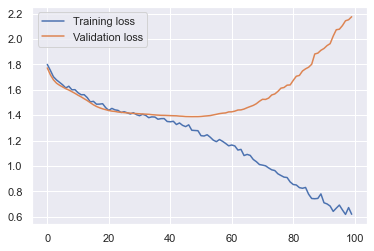

In [123]:
# plot loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.show()

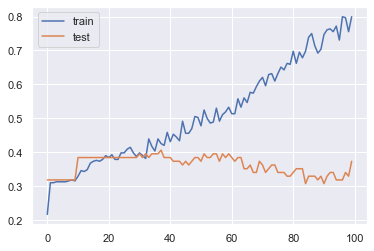

In [124]:
from matplotlib import pyplot

pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [125]:
scores = model.evaluate(X_train, Y_train, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 89.84%


In [126]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 37.36%


In [127]:
pred=model.predict(X_test)

In [128]:
y_pred=model.predict_classes(X_test)

In [129]:
y_test=np.argmax(Y_test, axis=1)

In [130]:
from sklearn.metrics import classification_report


print("\nAccuracy Score LSTM: ",accuracy_score(y_test,y_pred)*100,'\n')
print('Confusion matrix:', confusion_matrix(y_test,y_pred),'\n')
print('Classification report:',classification_report(y_test,y_pred),'\n')


Accuracy Score LSTM:  37.362637362637365 

Confusion matrix: [[ 3  6  1  0  0  0]
 [ 2  6  1 10  0  0]
 [ 3  5  4  9  0  0]
 [ 2  6  6 13  2  0]
 [ 0  2  1  1  2  0]
 [ 0  0  0  0  0  6]] 

Classification report:               precision    recall  f1-score   support

           0       0.30      0.30      0.30        10
           1       0.24      0.32      0.27        19
           2       0.31      0.19      0.24        21
           3       0.39      0.45      0.42        29
           4       0.50      0.33      0.40         6
           5       1.00      1.00      1.00         6

    accuracy                           0.37        91
   macro avg       0.46      0.43      0.44        91
weighted avg       0.38      0.37      0.37        91
 



<AxesSubplot:>

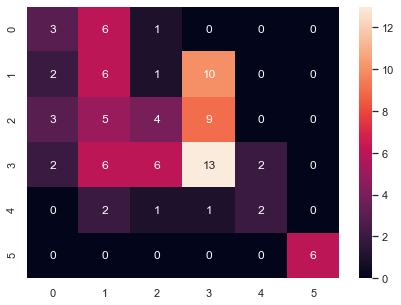

In [131]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# print(ann.evaluate(X_test, Y_test))
# y_predict = ann.predict(X_test)
# y_predict = (y_predict > 0.5) 


# cm = metrics.confusion_matrix(Y_test,y_predict, labels = [1,2,3,4,5,6])



y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm , index = [i for i in [0,1,2,3,4,5]],#["I", "II","III","IV","V","VI"]],
                     columns = [i for i in [0,1,2,3,4,5]])#["I","II","III","IV","V","VI"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

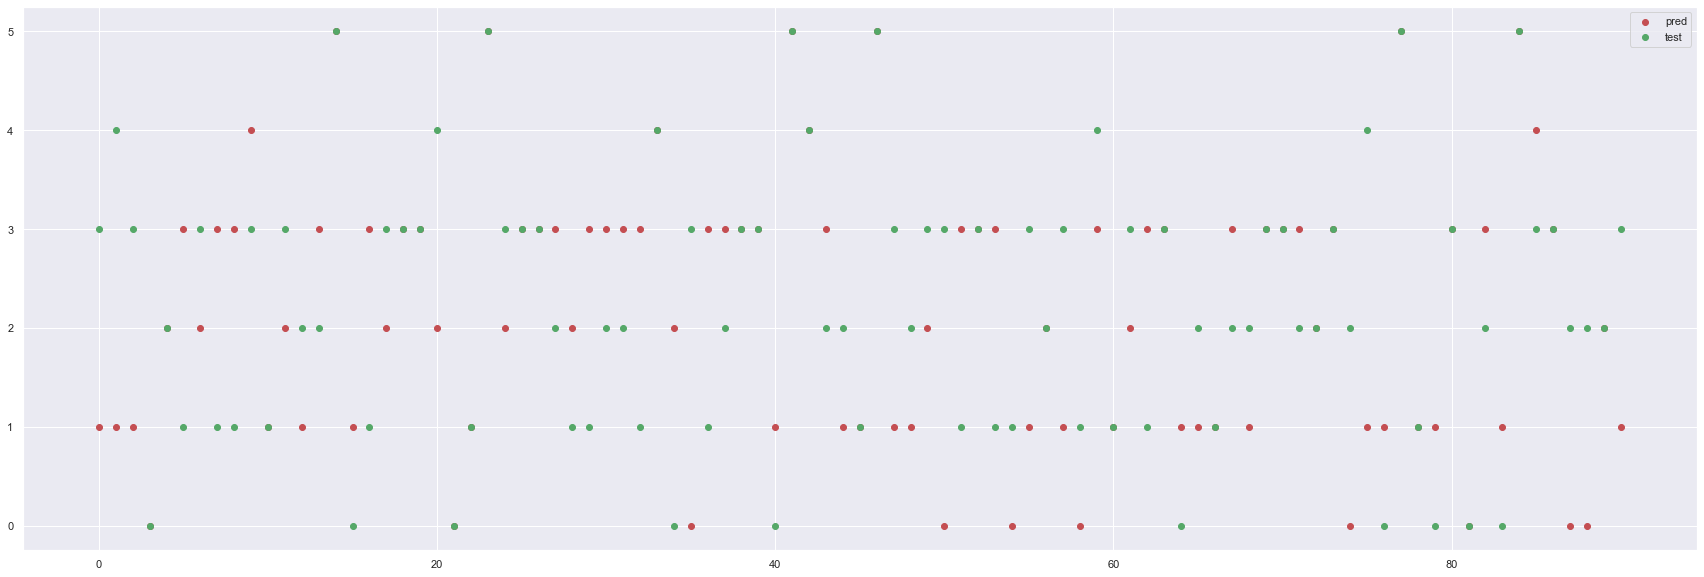

In [132]:
plt.figure(figsize=(30,10))
plt.scatter(range(len(y_pred)),y_pred,c='r', label='pred')
plt.scatter(range(len(y_test)),y_test,c='g', label='test')
plt.legend()
plt.show()

#### Inference
        LSTM provides 39% Accuracy

####        ‣ Step 5: Choose the best performing model classifier and pickle it.

In [133]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [134]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model.h5')
# summarize model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            117248    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                

In [135]:
# Modle - 3

In [136]:
data_m2 = pd.get_dummies(data_1, columns=["Potential Accident Level"], prefix=["PAL_"] )

In [137]:
data_m=data_m2[(data_m2['PAL__3'] == 1) | (data_m2['PAL__2'] == 1)]
data_m.head(10)

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,PAL__0,PAL__1,PAL__2,PAL__3,PAL__4,PAL__5
0,-0.051227,0.084640,0.000207,0.023966,-0.009393,-0.195789,0.073653,0.235352,-0.118588,-0.091197,...,0.074594,-0.151654,0.055274,-0.015448,0,0,0,1,0,0
1,-0.057766,0.083784,0.011843,0.025843,-0.014934,-0.174377,0.070952,0.222473,-0.100741,-0.079851,...,0.072062,-0.150910,0.047488,-0.012230,0,0,0,1,0,0
2,-0.053946,0.082449,-0.004536,0.028894,-0.007251,-0.194677,0.075830,0.243933,-0.109813,-0.098287,...,0.077882,-0.147810,0.057704,-0.026926,0,0,1,0,0,0
4,-0.049342,0.080150,0.007055,0.025196,-0.013177,-0.195350,0.073155,0.238740,-0.116594,-0.086796,...,0.069511,-0.152585,0.056897,-0.023521,0,0,0,1,0,0
5,-0.051506,0.080231,-0.003939,0.032395,-0.011373,-0.194826,0.074898,0.235096,-0.112216,-0.094652,...,0.078368,-0.161451,0.064212,-0.021343,0,0,1,0,0,0
6,-0.060789,0.085625,0.000996,0.022251,0.001705,-0.196025,0.073426,0.244167,-0.112102,-0.089548,...,0.074663,-0.156171,0.062711,-0.022216,0,0,1,0,0,0
7,-0.049220,0.087673,-0.001747,0.034435,-0.006235,-0.197221,0.076375,0.234575,-0.111153,-0.095355,...,0.077333,-0.154057,0.054969,-0.023258,0,0,1,0,0,0
8,-0.059127,0.076963,0.002519,0.022752,-0.004114,-0.202857,0.080870,0.244358,-0.107988,-0.096530,...,0.066371,-0.149718,0.066712,-0.014309,0,0,0,1,0,0
10,-0.054898,0.074155,-0.002224,0.026042,-0.012326,-0.192235,0.076338,0.243383,-0.114369,-0.090183,...,0.084147,-0.141580,0.061131,-0.018401,0,0,1,0,0,0
11,-0.048181,0.089828,0.005633,0.027805,-0.016269,-0.188750,0.083123,0.235755,-0.117039,-0.101586,...,0.074040,-0.150864,0.055978,-0.015735,0,0,0,1,0,0


In [138]:
# data_m2[data_m2['PAL__2']==1 | data_m2['PAL__3']==1 ]

In [139]:
# data_m1=pd.read_csv("milestone1_dataset.csv")

In [140]:
# data_m1['Potential Accident Level'].value_counts()

In [141]:

# generate binary values using get_dummies
# data_m2 = pd.get_dummies(data_m1, columns=["Potential Accident Level"], prefix=["PAL_"] )
# # merge with main df bridge_df on key values
# data = data.join(dum_df)


In [142]:
Y = np.array(data_m['PAL__3'])
X = data_m.drop(['PAL__0', 'PAL__1', 'PAL__2','PAL__3', 'PAL__4', 'PAL__5'], axis=1)


In [143]:

print('X shape : ({0},{1})'.format(X.shape[0], X.shape[1]))
print('Y shape : ({0},)'.format(Y.shape[0]))


X shape : (249,100)
Y shape : (249,)


In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [145]:
X_train.shape,X_test.shape

((174, 100), (75, 100))

In [146]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("\nAccuracy Score NB: ",accuracy_score(Y_test,pred)*100,'\n')
print('Confusion matrix:', confusion_matrix(Y_test,pred),'\n')
print('Classification report:',classification_report(Y_test,pred),'\n')


Accuracy Score NB:  60.0 

Confusion matrix: [[12 20]
 [10 33]] 

Classification report:               precision    recall  f1-score   support

           0       0.55      0.38      0.44        32
           1       0.62      0.77      0.69        43

    accuracy                           0.60        75
   macro avg       0.58      0.57      0.57        75
weighted avg       0.59      0.60      0.58        75
 



# ANN with hyperparameters

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                6464      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 16,629
Trainable params: 16,629
Non-trainable params: 0
_________________________________________________________________
None
Train on 174 samples, validate on 75 samples
Epoch 1/250
174/174 [==============================] - 1s 5ms/samp

174/174 [==============================] - 0s 314us/sample - loss: 1.2578 - accuracy: 0.7069 - val_loss: 1.3832 - val_accuracy: 0.5733
Epoch 50/250
174/174 [==============================] - 0s 306us/sample - loss: 1.3221 - accuracy: 0.6782 - val_loss: 1.3811 - val_accuracy: 0.5600
Epoch 51/250
174/174 [==============================] - 0s 321us/sample - loss: 1.3262 - accuracy: 0.6437 - val_loss: 1.3812 - val_accuracy: 0.5733
Epoch 52/250
174/174 [==============================] - 0s 315us/sample - loss: 1.2555 - accuracy: 0.7356 - val_loss: 1.3806 - val_accuracy: 0.5867
Epoch 53/250
174/174 [==============================] - 0s 311us/sample - loss: 1.2642 - accuracy: 0.7184 - val_loss: 1.3800 - val_accuracy: 0.5867
Epoch 54/250
174/174 [==============================] - 0s 307us/sample - loss: 1.2827 - accuracy: 0.6782 - val_loss: 1.3778 - val_accuracy: 0.5867
Epoch 55/250
174/174 [==============================] - 0s 303us/sample - loss: 1.2770 - accuracy: 0.7126 - val_loss: 1.3764 

174/174 [==============================] - 0s 312us/sample - loss: 1.1171 - accuracy: 0.8046 - val_loss: 1.3544 - val_accuracy: 0.5467
Epoch 105/250
174/174 [==============================] - 0s 314us/sample - loss: 1.1544 - accuracy: 0.7414 - val_loss: 1.3540 - val_accuracy: 0.5467
Epoch 106/250
174/174 [==============================] - 0s 313us/sample - loss: 1.1558 - accuracy: 0.7931 - val_loss: 1.3540 - val_accuracy: 0.5467
Epoch 107/250
174/174 [==============================] - 0s 318us/sample - loss: 1.1663 - accuracy: 0.7586 - val_loss: 1.3552 - val_accuracy: 0.5467
Epoch 108/250
174/174 [==============================] - 0s 306us/sample - loss: 1.1251 - accuracy: 0.8218 - val_loss: 1.3548 - val_accuracy: 0.5467
Epoch 109/250
174/174 [==============================] - 0s 303us/sample - loss: 1.1833 - accuracy: 0.7529 - val_loss: 1.3537 - val_accuracy: 0.5467
Epoch 110/250
174/174 [==============================] - 0s 314us/sample - loss: 1.1092 - accuracy: 0.8103 - val_loss: 1

174/174 [==============================] - 0s 310us/sample - loss: 1.0211 - accuracy: 0.8506 - val_loss: 1.3533 - val_accuracy: 0.4933
Epoch 160/250
174/174 [==============================] - 0s 312us/sample - loss: 1.0169 - accuracy: 0.8391 - val_loss: 1.3547 - val_accuracy: 0.4933
Epoch 161/250
174/174 [==============================] - 0s 310us/sample - loss: 1.0121 - accuracy: 0.8391 - val_loss: 1.3555 - val_accuracy: 0.4933
Epoch 162/250
174/174 [==============================] - 0s 325us/sample - loss: 1.0468 - accuracy: 0.8161 - val_loss: 1.3567 - val_accuracy: 0.4933
Epoch 163/250
174/174 [==============================] - 0s 301us/sample - loss: 1.0295 - accuracy: 0.8391 - val_loss: 1.3563 - val_accuracy: 0.4933
Epoch 164/250
174/174 [==============================] - 0s 302us/sample - loss: 0.9888 - accuracy: 0.8908 - val_loss: 1.3554 - val_accuracy: 0.5067
Epoch 165/250
174/174 [==============================] - 0s 311us/sample - loss: 1.0289 - accuracy: 0.7989 - val_loss: 1

174/174 [==============================] - 0s 315us/sample - loss: 0.9044 - accuracy: 0.8908 - val_loss: 1.3929 - val_accuracy: 0.5200
Epoch 215/250
174/174 [==============================] - 0s 309us/sample - loss: 0.9267 - accuracy: 0.9023 - val_loss: 1.3916 - val_accuracy: 0.5200
Epoch 216/250
174/174 [==============================] - 0s 303us/sample - loss: 0.9155 - accuracy: 0.8908 - val_loss: 1.3916 - val_accuracy: 0.5200
Epoch 217/250
174/174 [==============================] - 0s 317us/sample - loss: 0.9099 - accuracy: 0.8678 - val_loss: 1.3907 - val_accuracy: 0.5200
Epoch 218/250
174/174 [==============================] - 0s 313us/sample - loss: 0.9336 - accuracy: 0.8621 - val_loss: 1.3883 - val_accuracy: 0.5333
Epoch 219/250
174/174 [==============================] - 0s 311us/sample - loss: 0.9010 - accuracy: 0.9080 - val_loss: 1.3913 - val_accuracy: 0.5200
Epoch 220/250
174/174 [==============================] - 0s 320us/sample - loss: 0.8817 - accuracy: 0.9253 - val_loss: 1

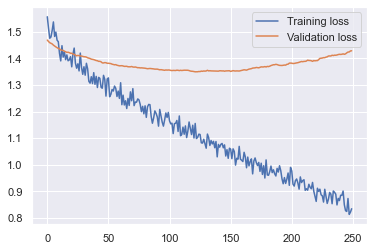

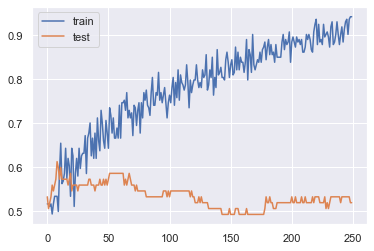

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
from tensorflow.keras.optimizers import SGD


model = Sequential()
model.add(Dense(100,input_dim=len(X_train[1,:]), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),bias_regularizer=regularizers.l2(0.001),activity_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),bias_regularizer=regularizers.l2(0.001),activity_regularizer=regularizers.l2(0.001)))
print(model.summary())
# adam = optimizers.Adam(lr =0.01)
sgd = SGD(lr=0.01, momentum=0.00)


model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy'])
history = model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs=250, batch_size=32)

# plot loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.show()


# plot acc

pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [149]:
pred=model.predict_classes(X_test)

In [150]:
from sklearn.metrics import classification_report


print("\nAccuracy Score LSTM: ",accuracy_score(Y_test,pred)*100,'\n')
print('Confusion matrix:\n', confusion_matrix(Y_test,pred),'\n')
print('Classification report:',classification_report(Y_test,pred),'\n')


Accuracy Score LSTM:  52.0 

Confusion matrix:
 [[13 19]
 [17 26]] 

Classification report:               precision    recall  f1-score   support

           0       0.43      0.41      0.42        32
           1       0.58      0.60      0.59        43

    accuracy                           0.52        75
   macro avg       0.51      0.51      0.51        75
weighted avg       0.52      0.52      0.52        75
 



<AxesSubplot:>

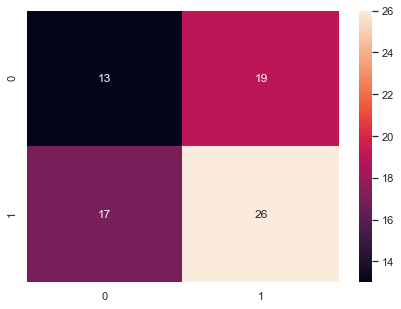

In [151]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# print(ann.evaluate(X_test, Y_test))
# y_predict = ann.predict(X_test)
# y_predict = (y_predict > 0.5) 


# cm = metrics.confusion_matrix(Y_test,y_predict, labels = [1,2,3,4,5,6])



# y_pred=np.argmax(pred, axis=1)
# y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(Y_test, pred)
df_cm = pd.DataFrame(cm , index = [i for i in [0,1]],#["I", "II","III","IV","V","VI"]],
                     columns = [i for i in [0,1]])#["I","II","III","IV","V","VI"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [152]:
# data_m=data_m2[(data_m2['PAL__3'] == 1) | (data_m2['PAL__2'] == 1)]
data_m=data_m2.copy()
data_m.head(10)

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,PAL__0,PAL__1,PAL__2,PAL__3,PAL__4,PAL__5
0,-0.051227,0.084640,0.000207,0.023966,-0.009393,-0.195789,0.073653,0.235352,-0.118588,-0.091197,...,0.074594,-0.151654,0.055274,-0.015448,0,0,0,1,0,0
1,-0.057766,0.083784,0.011843,0.025843,-0.014934,-0.174377,0.070952,0.222473,-0.100741,-0.079851,...,0.072062,-0.150910,0.047488,-0.012230,0,0,0,1,0,0
2,-0.053946,0.082449,-0.004536,0.028894,-0.007251,-0.194677,0.075830,0.243933,-0.109813,-0.098287,...,0.077882,-0.147810,0.057704,-0.026926,0,0,1,0,0,0
3,-0.052827,0.086006,0.004465,0.025327,-0.007647,-0.189444,0.076437,0.232671,-0.120193,-0.095167,...,0.074876,-0.145583,0.051008,-0.018997,1,0,0,0,0,0
4,-0.049342,0.080150,0.007055,0.025196,-0.013177,-0.195350,0.073155,0.238740,-0.116594,-0.086796,...,0.069511,-0.152585,0.056897,-0.023521,0,0,0,1,0,0
5,-0.051506,0.080231,-0.003939,0.032395,-0.011373,-0.194826,0.074898,0.235096,-0.112216,-0.094652,...,0.078368,-0.161451,0.064212,-0.021343,0,0,1,0,0,0
6,-0.060789,0.085625,0.000996,0.022251,0.001705,-0.196025,0.073426,0.244167,-0.112102,-0.089548,...,0.074663,-0.156171,0.062711,-0.022216,0,0,1,0,0,0
7,-0.049220,0.087673,-0.001747,0.034435,-0.006235,-0.197221,0.076375,0.234575,-0.111153,-0.095355,...,0.077333,-0.154057,0.054969,-0.023258,0,0,1,0,0,0
8,-0.059127,0.076963,0.002519,0.022752,-0.004114,-0.202857,0.080870,0.244358,-0.107988,-0.096530,...,0.066371,-0.149718,0.066712,-0.014309,0,0,0,1,0,0
9,-0.052059,0.075990,0.010755,0.024535,-0.008652,-0.193158,0.080613,0.229540,-0.119484,-0.086716,...,0.065285,-0.153678,0.059221,-0.024824,0,1,0,0,0,0


In [153]:
Y = np.array(data_m['PAL__3'])
X = data_m.drop(['PAL__0', 'PAL__1', 'PAL__2','PAL__3', 'PAL__4', 'PAL__5'], axis=1)



In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [155]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [156]:
np.set_printoptions(formatter={'float':'{:0.2f}'.format})

In [157]:
import numpy as np
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [158]:
# configure network
n_batch = (len(X_train)/6)
n_epoch = 150
n_neurons = 100
# design network
model = Sequential()
model.add(LSTM(n_neurons, batch_input_shape=(n_batch, 1, 100), stateful=True))
model.add(Dense(1,activation='sigmoid',kernel_regularizer = regularizers.l2(0.1)))
sgd = SGD(lr=0.1, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# fit network
for i in range(n_epoch):
    model.fit(X_train, Y_train,  epochs=1, batch_size=n_batch, verbose=1, shuffle=False)
    model.reset_states()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (53, 100)                 80400     
_________________________________________________________________
dense_8 (Dense)              (53, 1)                   101       
Total params: 80,501
Trainable params: 80,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 318 samples
318/318 [==============================] - 2s 5ms/sample - loss: 0.8365 - accuracy: 0.5660
Train on 318 samples
318/318 [==============================] - 0s 184us/sample - loss: 0.6626 - accuracy: 0.6855
Train on 318 samples
318/318 [==============================] - 0s 184us/sample - loss: 0.6232 - accuracy: 0.6855
Train on 318 samples
318/318 [==============================] - 0s 184us/sample - loss: 0.6369 - accuracy: 0.6855
Train on 318 samples
318/318 [=======================

318/318 [==============================] - 0s 175us/sample - loss: 0.4690 - accuracy: 0.8428
Train on 318 samples
318/318 [==============================] - 0s 176us/sample - loss: 0.4665 - accuracy: 0.8428
Train on 318 samples
318/318 [==============================] - 0s 175us/sample - loss: 0.4640 - accuracy: 0.8491
Train on 318 samples
318/318 [==============================] - 0s 175us/sample - loss: 0.4616 - accuracy: 0.8522
Train on 318 samples
318/318 [==============================] - 0s 174us/sample - loss: 0.4591 - accuracy: 0.8585
Train on 318 samples
318/318 [==============================] - 0s 174us/sample - loss: 0.4566 - accuracy: 0.8616
Train on 318 samples
318/318 [==============================] - 0s 176us/sample - loss: 0.4542 - accuracy: 0.8585
Train on 318 samples
318/318 [==============================] - 0s 169us/sample - loss: 0.4518 - accuracy: 0.8616
Train on 318 samples
318/318 [==============================] - 0s 173us/sample - loss: 0.4494 - accuracy: 0.

318/318 [==============================] - 0s 175us/sample - loss: 0.3318 - accuracy: 0.9748
Train on 318 samples
318/318 [==============================] - 0s 174us/sample - loss: 0.3305 - accuracy: 0.9748
Train on 318 samples
318/318 [==============================] - 0s 170us/sample - loss: 0.3292 - accuracy: 0.9748
Train on 318 samples
318/318 [==============================] - 0s 166us/sample - loss: 0.3279 - accuracy: 0.9748
Train on 318 samples
318/318 [==============================] - 0s 169us/sample - loss: 0.3267 - accuracy: 0.9748
Train on 318 samples
318/318 [==============================] - 0s 174us/sample - loss: 0.3254 - accuracy: 0.9748
Train on 318 samples
318/318 [==============================] - 0s 171us/sample - loss: 0.3242 - accuracy: 0.9748
Train on 318 samples
318/318 [==============================] - 0s 167us/sample - loss: 0.3230 - accuracy: 0.9780
Train on 318 samples
318/318 [==============================] - 0s 170us/sample - loss: 0.3218 - accuracy: 0.

In [159]:
# model.get_config()

In [160]:
# re-define the batch size
n_batch = 1
# re-define model
new_model = Sequential()
new_model.add(LSTM(n_neurons, batch_input_shape=(n_batch, 1,100), stateful=True))
# new_model.add(Dense(1))
new_model.add(Dense(1,activation='sigmoid',kernel_regularizer = regularizers.l2(0.1)))
# copy weights
old_weights = model.get_weights()
new_model.set_weights(old_weights)
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (1, 100)                  80400     
_________________________________________________________________
dense_9 (Dense)              (1, 1)                    101       
Total params: 80,501
Trainable params: 80,501
Non-trainable params: 0
_________________________________________________________________


In [161]:
yhat = new_model.predict_classes(X_test, batch_size=n_batch)

In [162]:
# pred=model.predict_classes(X_test,batch_size=1)

In [163]:
Y_train.shape[0]/len(Y)*100,Y_test.shape[0]/len(Y)*100

(69.89010989010988, 30.10989010989011)

In [164]:
print("Y_train 1's %:", Y_train.sum()/len(Y)*100,"\nY_test 1's %:",Y_test.sum()/len(Y)*100)
print("")
print("Y_train 0's %:", (len(Y)-Y_train.sum())/len(Y)*100,"\nY_test 0's %:",(len(Y)-Y_test.sum())/len(Y)*100)

Y_train 1's %: 21.978021978021978 
Y_test 1's %: 9.45054945054945

Y_train 0's %: 78.02197802197803 
Y_test 0's %: 90.54945054945055


In [165]:
from sklearn.metrics import classification_report


print("\nAccuracy Score of LSTM with diff batch size: ",accuracy_score(Y_test,yhat)*100,'\n')
print('Confusion matrix:\n', confusion_matrix(Y_test,yhat),'\n')
print('Classification report:',classification_report(Y_test,yhat),'\n')


Accuracy Score of LSTM with diff batch size:  64.23357664233576 

Confusion matrix:
 [[75 19]
 [30 13]] 

Classification report:               precision    recall  f1-score   support

           0       0.71      0.80      0.75        94
           1       0.41      0.30      0.35        43

    accuracy                           0.64       137
   macro avg       0.56      0.55      0.55       137
weighted avg       0.62      0.64      0.63       137
 



In [166]:
# save model and architecture to single file
new_model.save("model_3.h5")
print("Saved model to disk")

Saved model to disk


In [167]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_3.h5')
# summarize model.
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (1, 100)                  80400     
_________________________________________________________________
dense_9 (Dense)              (1, 1)                    101       
Total params: 80,501
Trainable params: 80,501
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

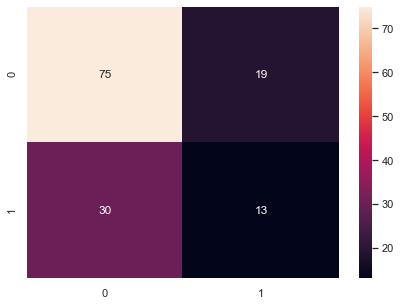

In [168]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


pred=model.predict_classes(X_test, batch_size=n_batch)

cm = confusion_matrix(Y_test, pred)
df_cm = pd.DataFrame(cm , index = [i for i in [0,1]],#["I", "II","III","IV","V","VI"]],
                     columns = [i for i in [0,1]])#["I","II","III","IV","V","VI"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [169]:
# Y = np.array(data_m['PAL__3'])
# X = data_m.drop(['PAL__0', 'PAL__1', 'PAL__2','PAL__3', 'PAL__4', 'PAL__5'], axis=1)


In [170]:
# data['Potential Accident Level'].value_counts()

# LSTM Model and Varied Batch Size with Copy Weights 

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import classification_report
# Oversample and plot imbalanced dataset with SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
import pickle


def pre_model(X,Y,modelnm):
    
#SMOTE
# summarize class distribution
    counter = Counter(Y)
    print(counter)

# transform the dataset
    oversample = SMOTE()
    X_SMOTE,Y_SMOTE = oversample.fit_resample(X, Y)
    
# summarize the new class distribution
    counter = Counter(Y_SMOTE)
    print(counter)
    
#train & test split
    X_train, X_test, Y_train, Y_test = train_test_split(X_SMOTE, Y_SMOTE, test_size=0.33, random_state=42, stratify=Y_SMOTE)
    print("X_train: ",X_train.shape)
    print("X_test: ", X_test.shape)
    
#Normalization - Performing Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
# save the StandardScaler model
    filename = modelnm+'sc.sav'
    pickle.dump(sc, open(filename, 'wb'))

#transform 2D array to a 3D array comprised of [rows, timesteps, columns] where timesteps is 1 because we only have one timestep per observation on each row.
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# def post_model():
#modeling
# configure network
    n_batch = len(X_train)
    n_epoch = 150
    n_neurons = 100

# design network
    model = Sequential()
    model.add(LSTM(n_neurons, batch_input_shape=(n_batch, 1, 100), stateful=True))
    model.add(Dense(1,activation='sigmoid',kernel_regularizer = regularizers.l2(0.1)))
    sgd = SGD(lr=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print(model.summary())
    
# fit network
    for i in range(n_epoch):
        model.fit(X_train, Y_train,  epochs=1, batch_size=n_batch, verbose=1, shuffle=False)
        model.reset_states()

    # re-define the batch size
    n_batch = 1
    # re-define model
    new_model = Sequential()
    new_model.add(LSTM(n_neurons, batch_input_shape=(n_batch, 1,100), stateful=True))
    new_model.add(Dense(1,activation='sigmoid',kernel_regularizer = regularizers.l2(0.1)))
    # copy weights
    old_weights = model.get_weights()
    new_model.set_weights(old_weights)
    print(new_model.summary())


#predict 
    yhat = new_model.predict_classes(X_test, batch_size=n_batch)

#Performance metrics
    print("Y_train 1's %:", Y_train.sum()/len(Y)*100,"\nY_test 1's %:",Y_test.sum()/len(Y)*100)
    print("")
    print("Y_train 0's %:", (len(Y)-Y_train.sum())/len(Y)*100,"\nY_test 0's %:",(len(Y)-Y_test.sum())/len(Y)*100)

    
    print("\nAccuracy Score of LSTM with diff batch size: ",accuracy_score(Y_test,yhat)*100,'\n')
    print('Confusion matrix:\n', confusion_matrix(Y_test,yhat),'\n')
    print('Classification report:',classification_report(Y_test,yhat),'\n')
    # save model and architecture to single file
    new_model.save(modelnm+".h5")
    print("Saved model to disk: ",modelnm+".h5")

In [172]:
#function call - model training & saving
#########################################################################################
modelnm="model_cat3"
data_m=data_m2.copy()
data_m.head(10)

print("")
print("==Cat3==")
#63% cat3
Y = np.array(data_m['PAL__3'])
X = data_m.drop(['PAL__0', 'PAL__1', 'PAL__2','PAL__3', 'PAL__4', 'PAL__5'], axis=1)
pre_model(X,Y,modelnm) 

#########################################################################################
modelnm="model_cat2"
data_m=data_m2[(data_m2['PAL__3'] != 1)]
data_m.head(10)

print("")
print("==Cat2==")
#~67% cat2
Y = np.array(data_m['PAL__2'])
X = data_m.drop(['PAL__0', 'PAL__1', 'PAL__2','PAL__3', 'PAL__4', 'PAL__5'], axis=1)
pre_model(X,Y,modelnm) 

#########################################################################################
modelnm="model_cat1"
data_m=data_m2[(data_m2['PAL__3'] != 1) & (data_m2['PAL__2'] != 1)]
data_m.head(10)

print("")
print("==Cat1==")
#~64% cat1
Y = np.array(data_m['PAL__1'])
X = data_m.drop(['PAL__0', 'PAL__1', 'PAL__2','PAL__3', 'PAL__4', 'PAL__5'], axis=1)
pre_model(X,Y,modelnm) 

#########################################################################################
modelnm="model_cat0"
data_m=data_m2[(data_m2['PAL__3'] != 1) & (data_m2['PAL__2'] != 1) & (data_m2['PAL__1'] != 1) ]
data_m.head(10)

print("")
print("==Cat0==")

# ~75% cat0
Y = np.array(data_m['PAL__0'])
X = data_m.drop(['PAL__0', 'PAL__1', 'PAL__2','PAL__3', 'PAL__4', 'PAL__5'], axis=1)
pre_model(X,Y,modelnm) 

#########################################################################################
modelnm="model_cat4"
data_m=data_m2[(data_m2['PAL__3'] != 1) & (data_m2['PAL__2'] != 1) & (data_m2['PAL__1'] != 1) & (data_m2['PAL__0'] != 1) ]
data_m.head(10)

print("")
print("==Cat4==")

# 100% cat4
Y = np.array(data_m['PAL__4'])
X = data_m.drop(['PAL__0', 'PAL__1', 'PAL__2','PAL__3', 'PAL__4', 'PAL__5'], axis=1)
pre_model(X,Y,modelnm) 

#########################################################################################
# data_m=data_m2[(data_m2['PAL__3'] != 1) & (data_m2['PAL__2'] != 1) & (data_m2['PAL__1'] != 1) & (data_m2['PAL__0'] != 1)& (data_m2['PAL__4'] != 1) ]
# data_m.head(10)

# print("")
# print("==Cat5==")

# # 100% cat4
# Y = np.array(data_m['PAL__5'])
# X = data_m.drop(['PAL__0', 'PAL__1', 'PAL__2','PAL__3', 'PAL__4', 'PAL__5'], axis=1)
# pre_model(X,Y) 




==Cat3==
Counter({0: 312, 1: 143})
Counter({1: 312, 0: 312})
X_train:  (418, 100)
X_test:  (206, 100)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (418, 100)                80400     
_________________________________________________________________
dense_10 (Dense)             (418, 1)                  101       
Total params: 80,501
Trainable params: 80,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 418 samples
418/418 [==============================] - 2s 4ms/sample - loss: 0.8645 - accuracy: 0.4952
Train on 418 samples
418/418 [==============================] - 0s 87us/sample - loss: 0.8551 - accuracy: 0.5120
Train on 418 samples
418/418 [==============================] - 0s 86us/sample - loss: 0.8384 - accuracy: 0.5622
Train on 418 samples
418/418 [==============================] - 0s

418/418 [==============================] - 0s 88us/sample - loss: 0.6473 - accuracy: 0.7129
Train on 418 samples
418/418 [==============================] - 0s 91us/sample - loss: 0.6466 - accuracy: 0.7129
Train on 418 samples
418/418 [==============================] - 0s 91us/sample - loss: 0.6459 - accuracy: 0.7129
Train on 418 samples
418/418 [==============================] - 0s 99us/sample - loss: 0.6452 - accuracy: 0.7153
Train on 418 samples
418/418 [==============================] - 0s 90us/sample - loss: 0.6444 - accuracy: 0.7153
Train on 418 samples
418/418 [==============================] - 0s 89us/sample - loss: 0.6437 - accuracy: 0.7153
Train on 418 samples
418/418 [==============================] - 0s 89us/sample - loss: 0.6430 - accuracy: 0.7201
Train on 418 samples
418/418 [==============================] - 0s 88us/sample - loss: 0.6423 - accuracy: 0.7225
Train on 418 samples
418/418 [==============================] - 0s 90us/sample - loss: 0.6415 - accuracy: 0.7201
Trai

Train on 418 samples
418/418 [==============================] - 0s 79us/sample - loss: 0.5945 - accuracy: 0.8086
Train on 418 samples
418/418 [==============================] - 0s 79us/sample - loss: 0.5938 - accuracy: 0.8110
Train on 418 samples
418/418 [==============================] - 0s 86us/sample - loss: 0.5931 - accuracy: 0.8110
Train on 418 samples
418/418 [==============================] - 0s 75us/sample - loss: 0.5924 - accuracy: 0.8110
Train on 418 samples
418/418 [==============================] - 0s 75us/sample - loss: 0.5917 - accuracy: 0.8134
Train on 418 samples
418/418 [==============================] - 0s 79us/sample - loss: 0.5910 - accuracy: 0.8134
Train on 418 samples
418/418 [==============================] - 0s 79us/sample - loss: 0.5903 - accuracy: 0.8134
Train on 418 samples
418/418 [==============================] - 0s 80us/sample - loss: 0.5896 - accuracy: 0.8134
Train on 418 samples
418/418 [==============================] - 0s 78us/sample - loss: 0.5889 - 

Train on 276 samples
276/276 [==============================] - 0s 128us/sample - loss: 0.6223 - accuracy: 0.7500
Train on 276 samples
276/276 [==============================] - 0s 122us/sample - loss: 0.6207 - accuracy: 0.7500
Train on 276 samples
276/276 [==============================] - 0s 122us/sample - loss: 0.6192 - accuracy: 0.7500
Train on 276 samples
276/276 [==============================] - 0s 126us/sample - loss: 0.6176 - accuracy: 0.7500
Train on 276 samples
276/276 [==============================] - 0s 125us/sample - loss: 0.6161 - accuracy: 0.7464
Train on 276 samples
276/276 [==============================] - 0s 125us/sample - loss: 0.6147 - accuracy: 0.7500
Train on 276 samples
276/276 [==============================] - 0s 110us/sample - loss: 0.6132 - accuracy: 0.7536
Train on 276 samples
276/276 [==============================] - 0s 106us/sample - loss: 0.6117 - accuracy: 0.7609
Train on 276 samples
276/276 [==============================] - 0s 116us/sample - loss: 

Train on 276 samples
276/276 [==============================] - 0s 129us/sample - loss: 0.5256 - accuracy: 0.8659
Train on 276 samples
276/276 [==============================] - 0s 123us/sample - loss: 0.5243 - accuracy: 0.8659
Train on 276 samples
276/276 [==============================] - 0s 133us/sample - loss: 0.5230 - accuracy: 0.8659
Train on 276 samples
276/276 [==============================] - 0s 124us/sample - loss: 0.5218 - accuracy: 0.8659
Train on 276 samples
276/276 [==============================] - 0s 123us/sample - loss: 0.5205 - accuracy: 0.8659
Train on 276 samples
276/276 [==============================] - 0s 120us/sample - loss: 0.5193 - accuracy: 0.8659
Train on 276 samples
276/276 [==============================] - 0s 118us/sample - loss: 0.5180 - accuracy: 0.8659
Train on 276 samples
276/276 [==============================] - 0s 120us/sample - loss: 0.5167 - accuracy: 0.8659
Train on 276 samples
276/276 [==============================] - 0s 124us/sample - loss: 

Train on 148 samples
148/148 [==============================] - 0s 183us/sample - loss: 0.6478 - accuracy: 0.7230
Train on 148 samples
148/148 [==============================] - 0s 185us/sample - loss: 0.6432 - accuracy: 0.7297
Train on 148 samples
148/148 [==============================] - 0s 182us/sample - loss: 0.6385 - accuracy: 0.7297
Train on 148 samples
148/148 [==============================] - 0s 187us/sample - loss: 0.6337 - accuracy: 0.7297
Train on 148 samples
148/148 [==============================] - 0s 196us/sample - loss: 0.6293 - accuracy: 0.7230
Train on 148 samples
148/148 [==============================] - 0s 195us/sample - loss: 0.6254 - accuracy: 0.7297
Train on 148 samples
148/148 [==============================] - 0s 197us/sample - loss: 0.6219 - accuracy: 0.7432
Train on 148 samples
148/148 [==============================] - 0s 196us/sample - loss: 0.6189 - accuracy: 0.7500
Train on 148 samples
148/148 [==============================] - 0s 194us/sample - loss: 

Train on 148 samples
148/148 [==============================] - 0s 198us/sample - loss: 0.4921 - accuracy: 0.9257
Train on 148 samples
148/148 [==============================] - 0s 201us/sample - loss: 0.4901 - accuracy: 0.9257
Train on 148 samples
148/148 [==============================] - 0s 207us/sample - loss: 0.4880 - accuracy: 0.9257
Train on 148 samples
148/148 [==============================] - 0s 207us/sample - loss: 0.4860 - accuracy: 0.9257
Train on 148 samples
148/148 [==============================] - 0s 190us/sample - loss: 0.4840 - accuracy: 0.9257
Train on 148 samples
148/148 [==============================] - 0s 198us/sample - loss: 0.4819 - accuracy: 0.9257
Train on 148 samples
148/148 [==============================] - 0s 202us/sample - loss: 0.4799 - accuracy: 0.9257
Train on 148 samples
148/148 [==============================] - 0s 190us/sample - loss: 0.4779 - accuracy: 0.9257
Train on 148 samples
148/148 [==============================] - 0s 194us/sample - loss: 

83/83 [==============================] - 2s 19ms/sample - loss: 0.9093 - accuracy: 0.3012
Train on 83 samples
83/83 [==============================] - 0s 327us/sample - loss: 0.8605 - accuracy: 0.5301
Train on 83 samples
83/83 [==============================] - 0s 362us/sample - loss: 0.7855 - accuracy: 0.7590
Train on 83 samples
83/83 [==============================] - 0s 353us/sample - loss: 0.7104 - accuracy: 0.7831
Train on 83 samples
83/83 [==============================] - 0s 332us/sample - loss: 0.6498 - accuracy: 0.7831
Train on 83 samples
83/83 [==============================] - 0s 353us/sample - loss: 0.6058 - accuracy: 0.7831
Train on 83 samples
83/83 [==============================] - 0s 327us/sample - loss: 0.5756 - accuracy: 0.7711
Train on 83 samples
83/83 [==============================] - 0s 327us/sample - loss: 0.5552 - accuracy: 0.7711
Train on 83 samples
83/83 [==============================] - 0s 331us/sample - loss: 0.5419 - accuracy: 0.7711
Train on 83 samples
83

Train on 83 samples
83/83 [==============================] - 0s 368us/sample - loss: 0.3454 - accuracy: 0.9518
Train on 83 samples
83/83 [==============================] - 0s 353us/sample - loss: 0.3429 - accuracy: 0.9518
Train on 83 samples
83/83 [==============================] - 0s 365us/sample - loss: 0.3405 - accuracy: 0.9518
Train on 83 samples
83/83 [==============================] - 0s 364us/sample - loss: 0.3381 - accuracy: 0.9518
Train on 83 samples
83/83 [==============================] - 0s 365us/sample - loss: 0.3358 - accuracy: 0.9518
Train on 83 samples
83/83 [==============================] - 0s 371us/sample - loss: 0.3334 - accuracy: 0.9518
Train on 83 samples
83/83 [==============================] - 0s 361us/sample - loss: 0.3311 - accuracy: 0.9518
Train on 83 samples
83/83 [==============================] - 0s 384us/sample - loss: 0.3289 - accuracy: 0.9518
Train on 83 samples
83/83 [==============================] - 0s 391us/sample - loss: 0.3266 - accuracy: 0.9518
T

Train on 83 samples
83/83 [==============================] - 0s 356us/sample - loss: 0.2369 - accuracy: 1.0000
Train on 83 samples
83/83 [==============================] - 0s 374us/sample - loss: 0.2361 - accuracy: 1.0000
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (1, 100)                  80400     
_________________________________________________________________
dense_17 (Dense)             (1, 1)                    101       
Total params: 80,501
Trainable params: 80,501
Non-trainable params: 0
_________________________________________________________________
None
Y_train 1's %: 37.83783783783784 
Y_test 1's %: 18.01801801801802

Y_train 0's %: 62.16216216216216 
Y_test 0's %: 81.98198198198197

Accuracy Score of LSTM with diff batch size:  80.48780487804879 

Confusion matrix:
 [[13  8]
 [ 0 20]] 

Classification report:               precisi

41/41 [==============================] - 0s 750us/sample - loss: 0.1831 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 732us/sample - loss: 0.1826 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 751us/sample - loss: 0.1820 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 721us/sample - loss: 0.1815 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 701us/sample - loss: 0.1810 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 742us/sample - loss: 0.1805 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 759us/sample - loss: 0.1800 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 743us/sample - loss: 0.1795 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 740us/sample - loss: 0.1790 - accuracy: 1.0000
Train on 41 samples
4

Train on 41 samples
41/41 [==============================] - 0s 766us/sample - loss: 0.1583 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 713us/sample - loss: 0.1581 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 698us/sample - loss: 0.1578 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 738us/sample - loss: 0.1576 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 744us/sample - loss: 0.1574 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 734us/sample - loss: 0.1572 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 691us/sample - loss: 0.1570 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 715us/sample - loss: 0.1567 - accuracy: 1.0000
Train on 41 samples
41/41 [==============================] - 0s 714us/sample - loss: 0.1565 - accuracy: 1.0000
T

# Sequential Predictive model

In [175]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
from tqdm._tqdm_notebook import tqdm_notebook
# Gensim Libraries
import gensim
from gensim.models.word2vec import Word2Vec
import string

#preprocessing
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop=set(stopwords.words('english'))
tqdm_notebook.pandas()
def pred_preprocess(sentence):
          sentence=str(sentence) 
          corpus=[]
          lem=WordNetLemmatizer()
          words=[w for w in word_tokenize(sentence) if (w not in stop)]         
          words=[lem.lemmatize(w) for w in words if len(w)>2]
          words = [''.join(c for c in s if c not in string.punctuation) for s in words if s]
          words = [word.lower() for word in words]
          words = [word for word in words if word.isalpha()]
          corpus.append(words) 
          return " ".join(words)
        
#custom word2vec model load
model_name = "my_domain_specific_word2vec_model"
model_Word2Vec = Word2Vec.load(model_name)
def document_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    doc = [word for word in words if word in word2vec_model.wv.key_to_index]
    return np.mean(word2vec_model.wv[doc], axis=0)


def chatbot(str):
    #tokenize & convert word to vector
    words=(gensim.utils.simple_preprocess(str))
    vec=document_vector(model_Word2Vec, words)
    data_list=pd.DataFrame(vec)
    X_val=data_list.T

    #loop to sequential model - test for potential accident level 3, if not move to model 2 then 1, 0 & 4. If all gives 0, then it should be category 5 (per our logic)
    models = {4: 'model_cat3',3: 'model_cat2',2: 'model_cat1',1: 'model_cat0',5: 'model_cat4'}
    for cat, model in models.items():
       # load the StandardScaler model from disk
        filename=model+'sc.sav'
        model_sc = pickle.load(open(filename, 'rb'))
        X_valstd = model_sc.transform(X_val)
        X_valstd = np.reshape(X_valstd, (X_valstd.shape[0], 1, X_valstd.shape[1]))
        # load model
        model_lstm = load_model(model+'.h5')
        #predict function
        ypred=model_lstm.predict_classes(X_valstd, batch_size=1)
        if ypred[0][0] == 1:
           print("")
           print("Belongs to Potential Accident Level: ",cat)
           break
        else:
           if model == "model_cat4":
               print("")
               print("Belongs to Potential Accident Level: 6")
               break
           continue


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreekkanthkalyanasundaram/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shreekkanthkalyanasundaram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreekkanthkalyanasundaram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [178]:
#Get input string
str = input("Hi How can I assist you ? What happened ? : ")
chatbot(str)
str = input("Hi How can I assist you ? What happened ? : ")
chatbot(str)

Hi How can I assist you ? What happened ? : During the process of loading drills in the Carmen pit of level 3450, the operator positions the basket of the anfo loader 186 equipment at a height of 3m from the floor to carry out the loading of the production drills; At this moment, a stone slab of 1.4x0.7x0.2 m is detached from the front of the pit, which is tilted and lodged inside the basket, trapping the right leg of the collaborator.

Belongs to Potential Accident Level: 6
Hi How can I assist you ? What happened ? : Upon entering the mine interior; the bodeguero is located only in the litorina N ° 13, last of the convoy; during its displacement, the litorina derails and advances approximately 15 meters; it is when the operator observes this event and before entering through the entrance gate paralyzes the displacement of the convoy. The winemaker had his full EPPs on.

Belongs to Potential Accident Level:  4
